In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import zipfile
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
df=pd.read_csv(r"C:\Users\tusha\Downloads\avocado.csv.zip",compression='zip')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [5]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

this are the first 5 rows of the dataset

In [6]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

this are the last 5 rows of the dataset

In [7]:
df.sample(5)

Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
15661          19  2017-08-20          2.19      16040.58     333.17   
1474           18  2015-08-23          1.10    1477964.12   22589.42   
13785          32  2016-05-15          1.65      47778.34    5526.42   
9402           16  2015-09-06          1.53       5283.38      14.28   
6750           21  2017-08-06          1.30     283779.47  114985.35   

             4225     4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
15661     6341.29     2.76     9363.36     9363.36        0.00         0.00   
1474   1222687.73   822.48   231864.49   197249.71    34604.15        10.63   
13785    23572.79  2753.86    15925.27     9033.29     6891.98         0.00   
9402        92.40     0.00     5176.70     5176.70        0.00         0.00   
6750     53059.42  7126.40   108608.30    49026.33    59193.02       388.95   

               type  year               region  
15661       organic  2017  HartfordSpringfield  
1474   conventional  2015              NewYork  
13785       organic  2016               Plains  
9402        organic  2015     BuffaloRochester  
6750   conventional  2017             LasVegas

this are the random samples taken by the sample function


In [8]:
df.shape

(18249, 14)

this dataset contains 18249 rows and the 14 columns out of that 1 is our target variable  ('region')

In [9]:
df.columns.to_list()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

this are the column names of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


as we can see in this database 9 features are ('float64') and the 2 are ('int64'), remaining 3 are ('object') 

In [11]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

this are the data type of the features 

In [12]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

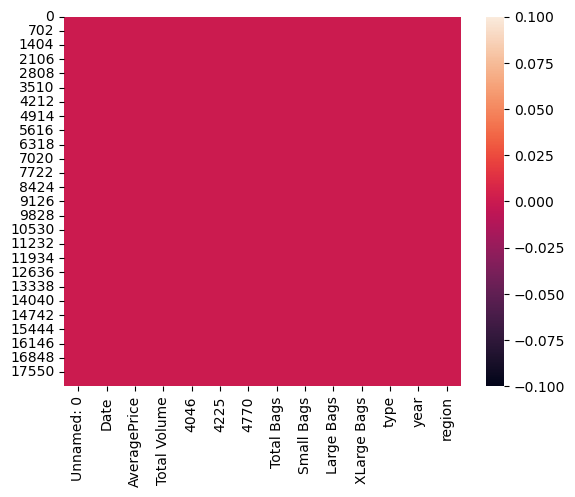

In [13]:
sns.heatmap(df.isnull())
plt.show()

in this dataset we do not have the null values

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

In [15]:
df['Date'].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

this are the unique values in the Date column

In [16]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

as we can see in the ('date') column data type is object we have to change the datatype of the date column.

In [17]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


as we can see in this feature ('Date') the data type has changed in the form of ('datetime64[ns]')

In [18]:
df.nunique().to_frame()

0
Unnamed: 0       53
Date            169
AveragePrice    259
Total Volume  18237
4046          17702
4225          18103
4770          12071
Total Bags    18097
Small Bags    17321
Large Bags    15082
XLarge Bags    5588
type              2
year              4
region           54

this are the number of unique values for the given dataset

In [19]:
df.describe(include='all')

Unnamed: 0                 Date  AveragePrice  Total Volume  \
count   18249.000000                18249  18249.000000  1.824900e+04   
unique           NaN                  169           NaN           NaN   
top              NaN  2015-12-27 00:00:00           NaN           NaN   
freq             NaN                  108           NaN           NaN   
first            NaN  2015-01-04 00:00:00           NaN           NaN   
last             NaN  2018-03-25 00:00:00           NaN           NaN   
mean       24.232232                  NaN      1.405978  8.506440e+05   
std        15.481045                  NaN      0.402677  3.453545e+06   
min         0.000000                  NaN      0.440000  8.456000e+01   
25%        10.000000                  NaN      1.100000  1.083858e+04   
50%        24.000000                  NaN      1.370000  1.073768e+05   
75%        38.000000                  NaN      1.660000  4.329623e+05   
max        52.000000                  NaN      3.250000  6.250565e+07   

                4046          4225          4770    Total Bags    Small Bags  \
count   1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN           NaN   
mean    2.930084e+05  2.951546e+05  2.283974e+04  2.396392e+05  1.821947e+05   
std     1.264989e+06  1.204120e+06  1.074641e+05  9.862424e+05  7.461785e+05   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     8.540700e+02  3.008780e+03  0.000000e+00  5.088640e+03  2.849420e+03   
50%     8.645300e+03  2.906102e+04  1.849900e+02  3.974383e+04  2.636282e+04   
75%     1.110202e+05  1.502069e+05  6.243420e+03  1.107834e+05  8.333767e+04   
max     2.274362e+07  2.047057e+07  2.546439e+06  1.937313e+07  1.338459e+07   

          Large Bags    XLarge Bags          type          year  region  
count   1.824900e+04   18249.000000         18249  18249.000000   18249  
unique           NaN            NaN             2           NaN      54  
top              NaN            NaN  conventional           NaN  Albany  
freq             NaN            NaN          9126           NaN     338  
first            NaN            NaN           NaN           NaN     NaN  
last             NaN            NaN           NaN           NaN     NaN  
mean    5.433809e+04    3106.426507           NaN   2016.147899     NaN  
std     2.439660e+05   17692.894652           NaN      0.939938     NaN  
min     0.000000e+00       0.000000           NaN   2015.000000     NaN  
25%     1.274700e+02       0.000000           NaN   2015.000000     NaN  
50%     2.647710e+03       0.000000           NaN   2016.000000     NaN  
75%     2.202925e+04     132.500000           NaN   2017.000000     NaN  
max     5.719097e+06  551693.650000           NaN   2018.000000     NaN

in this dataset as we can see in the above describe method the mean value is greater than the median('50%') value  in the ('Total Volume') feature and the feature ('Large Bags') it means the data is skewed towards right side 

and the features ('406','Total Bags','Small Bags',) mean value is less then the median('50%') value it means data is skewed towards left side 

and also we have bit difference in their ('75%') and the maximum value ('100%')

# sorting the features

In [20]:
numerical_columns=[]
categorical_columns=[]

for i in df.columns:
    if df.dtypes[i]=='object':
        categorical_columns.append([i])
    else:
        numerical_columns.append([i])
        
print('numerical_columns',numerical_columns)
print('\n')
print('categorical_columns',categorical_columns)

numerical_columns [['Unnamed: 0'], ['Date'], ['AveragePrice'], ['Total Volume'], ['4046'], ['4225'], ['4770'], ['Total Bags'], ['Small Bags'], ['Large Bags'], ['XLarge Bags'], ['year']]


categorical_columns [['type'], ['region']]


In [21]:
numeric_columns=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

# Data Analysis

univariate analysis

In [22]:
df.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

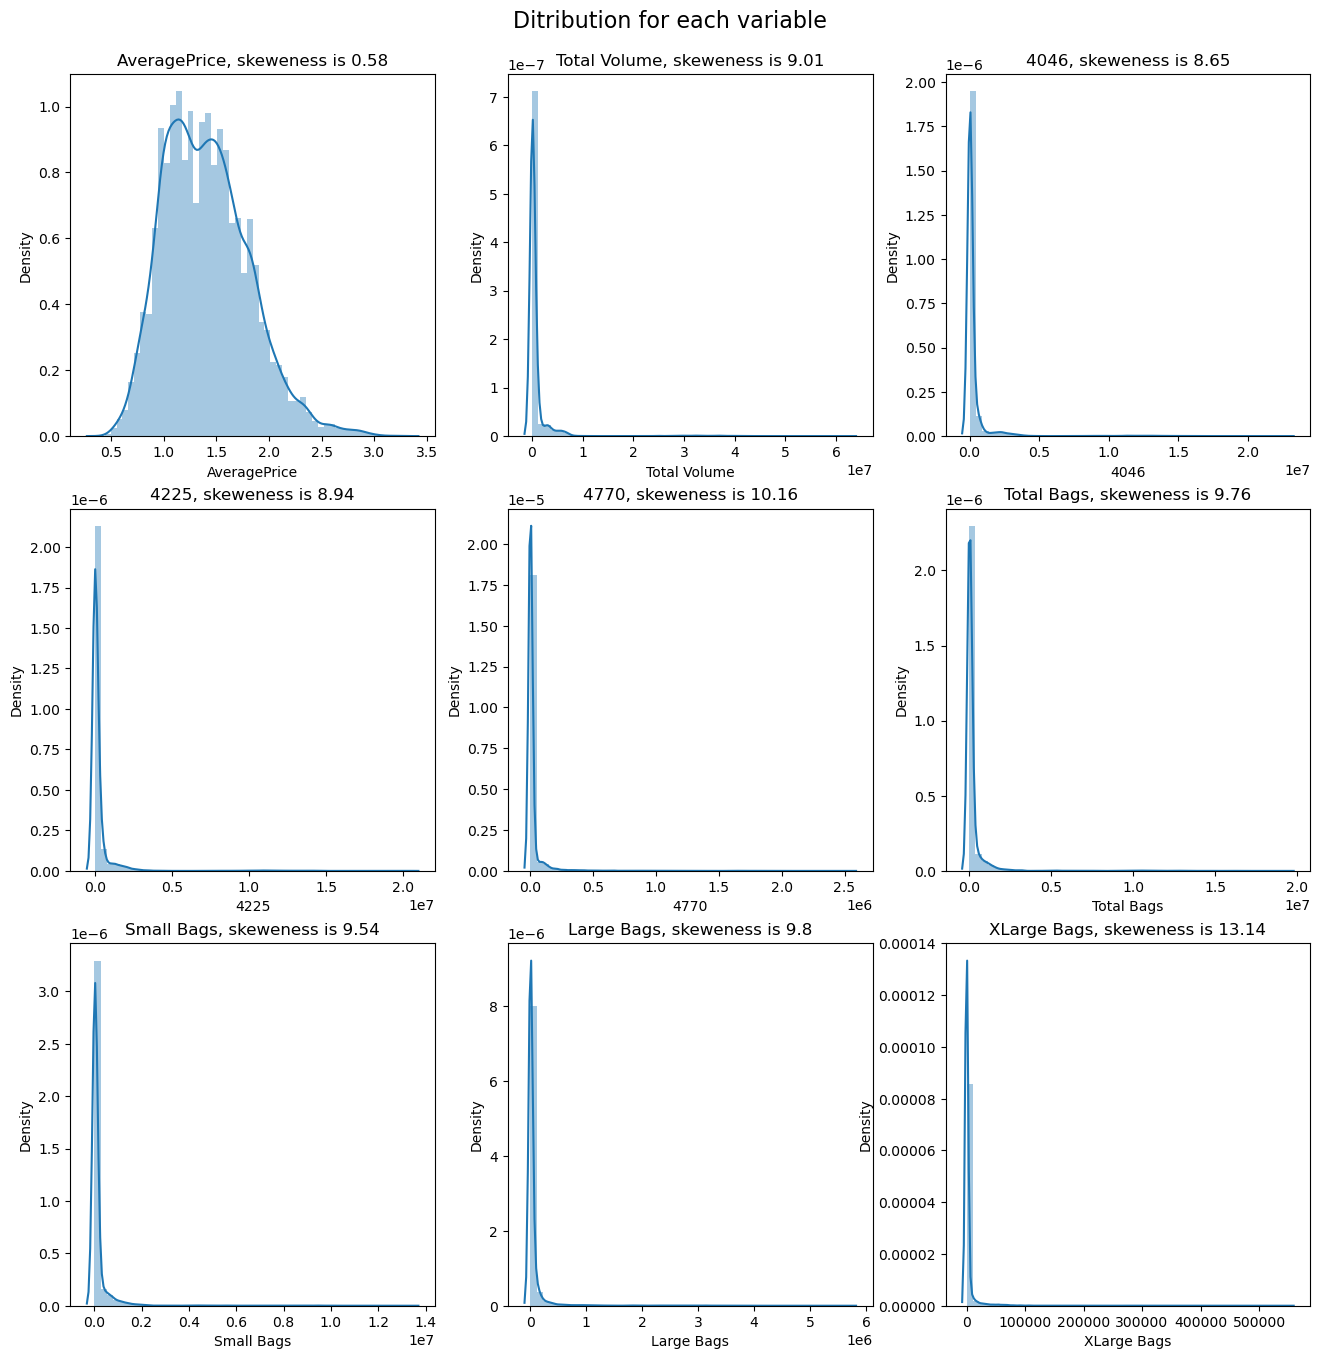

In [23]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows,cols,figsize=(16,16))
    fig.suptitle(suptitle, y=0.92, size=16)
    axs = axs.flatten()
    for i,data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skeweness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
dist_custom(dataset=df,columns_list=numeric_columns,rows=3,cols=3, suptitle='Ditribution for each variable')

as we can see in the above distplot only ('AveragePrice') feature is almost normally distributed rest of the features('Total Volume',('lookup codes',('4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')) are left skewed 

conventional    9126
organic         9123
Name: type, dtype: int64


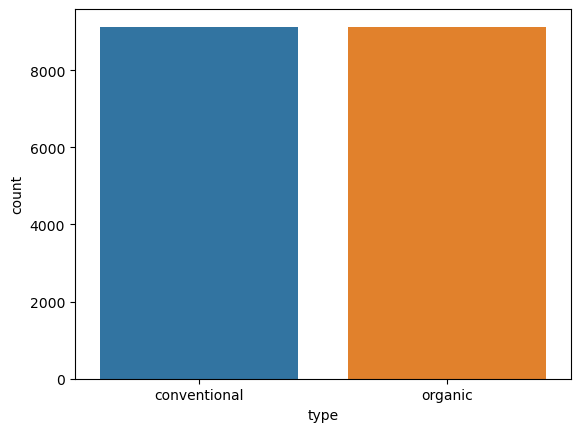

In [24]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df)
plt.show()

in this countplot as we can see there is not much difference between both the type('conventional','organic')

# Biavariate Analysis

In [25]:
df.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

3.25


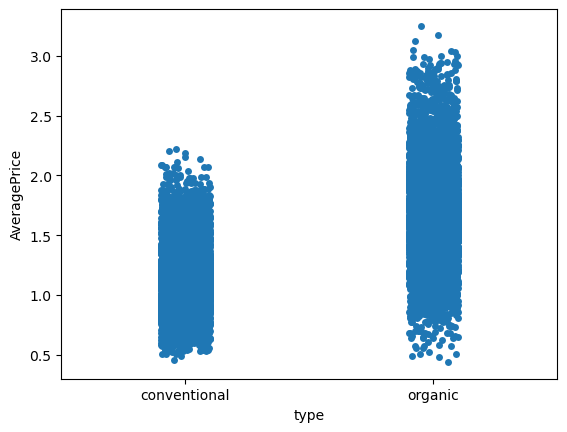

In [26]:
print(df['AveragePrice'].max())
sns.stripplot(x='type',y='AveragePrice',data=df)
plt.show()


in the above strip plot the ('organic') type of avocado average price is high than the ('conventional') type 

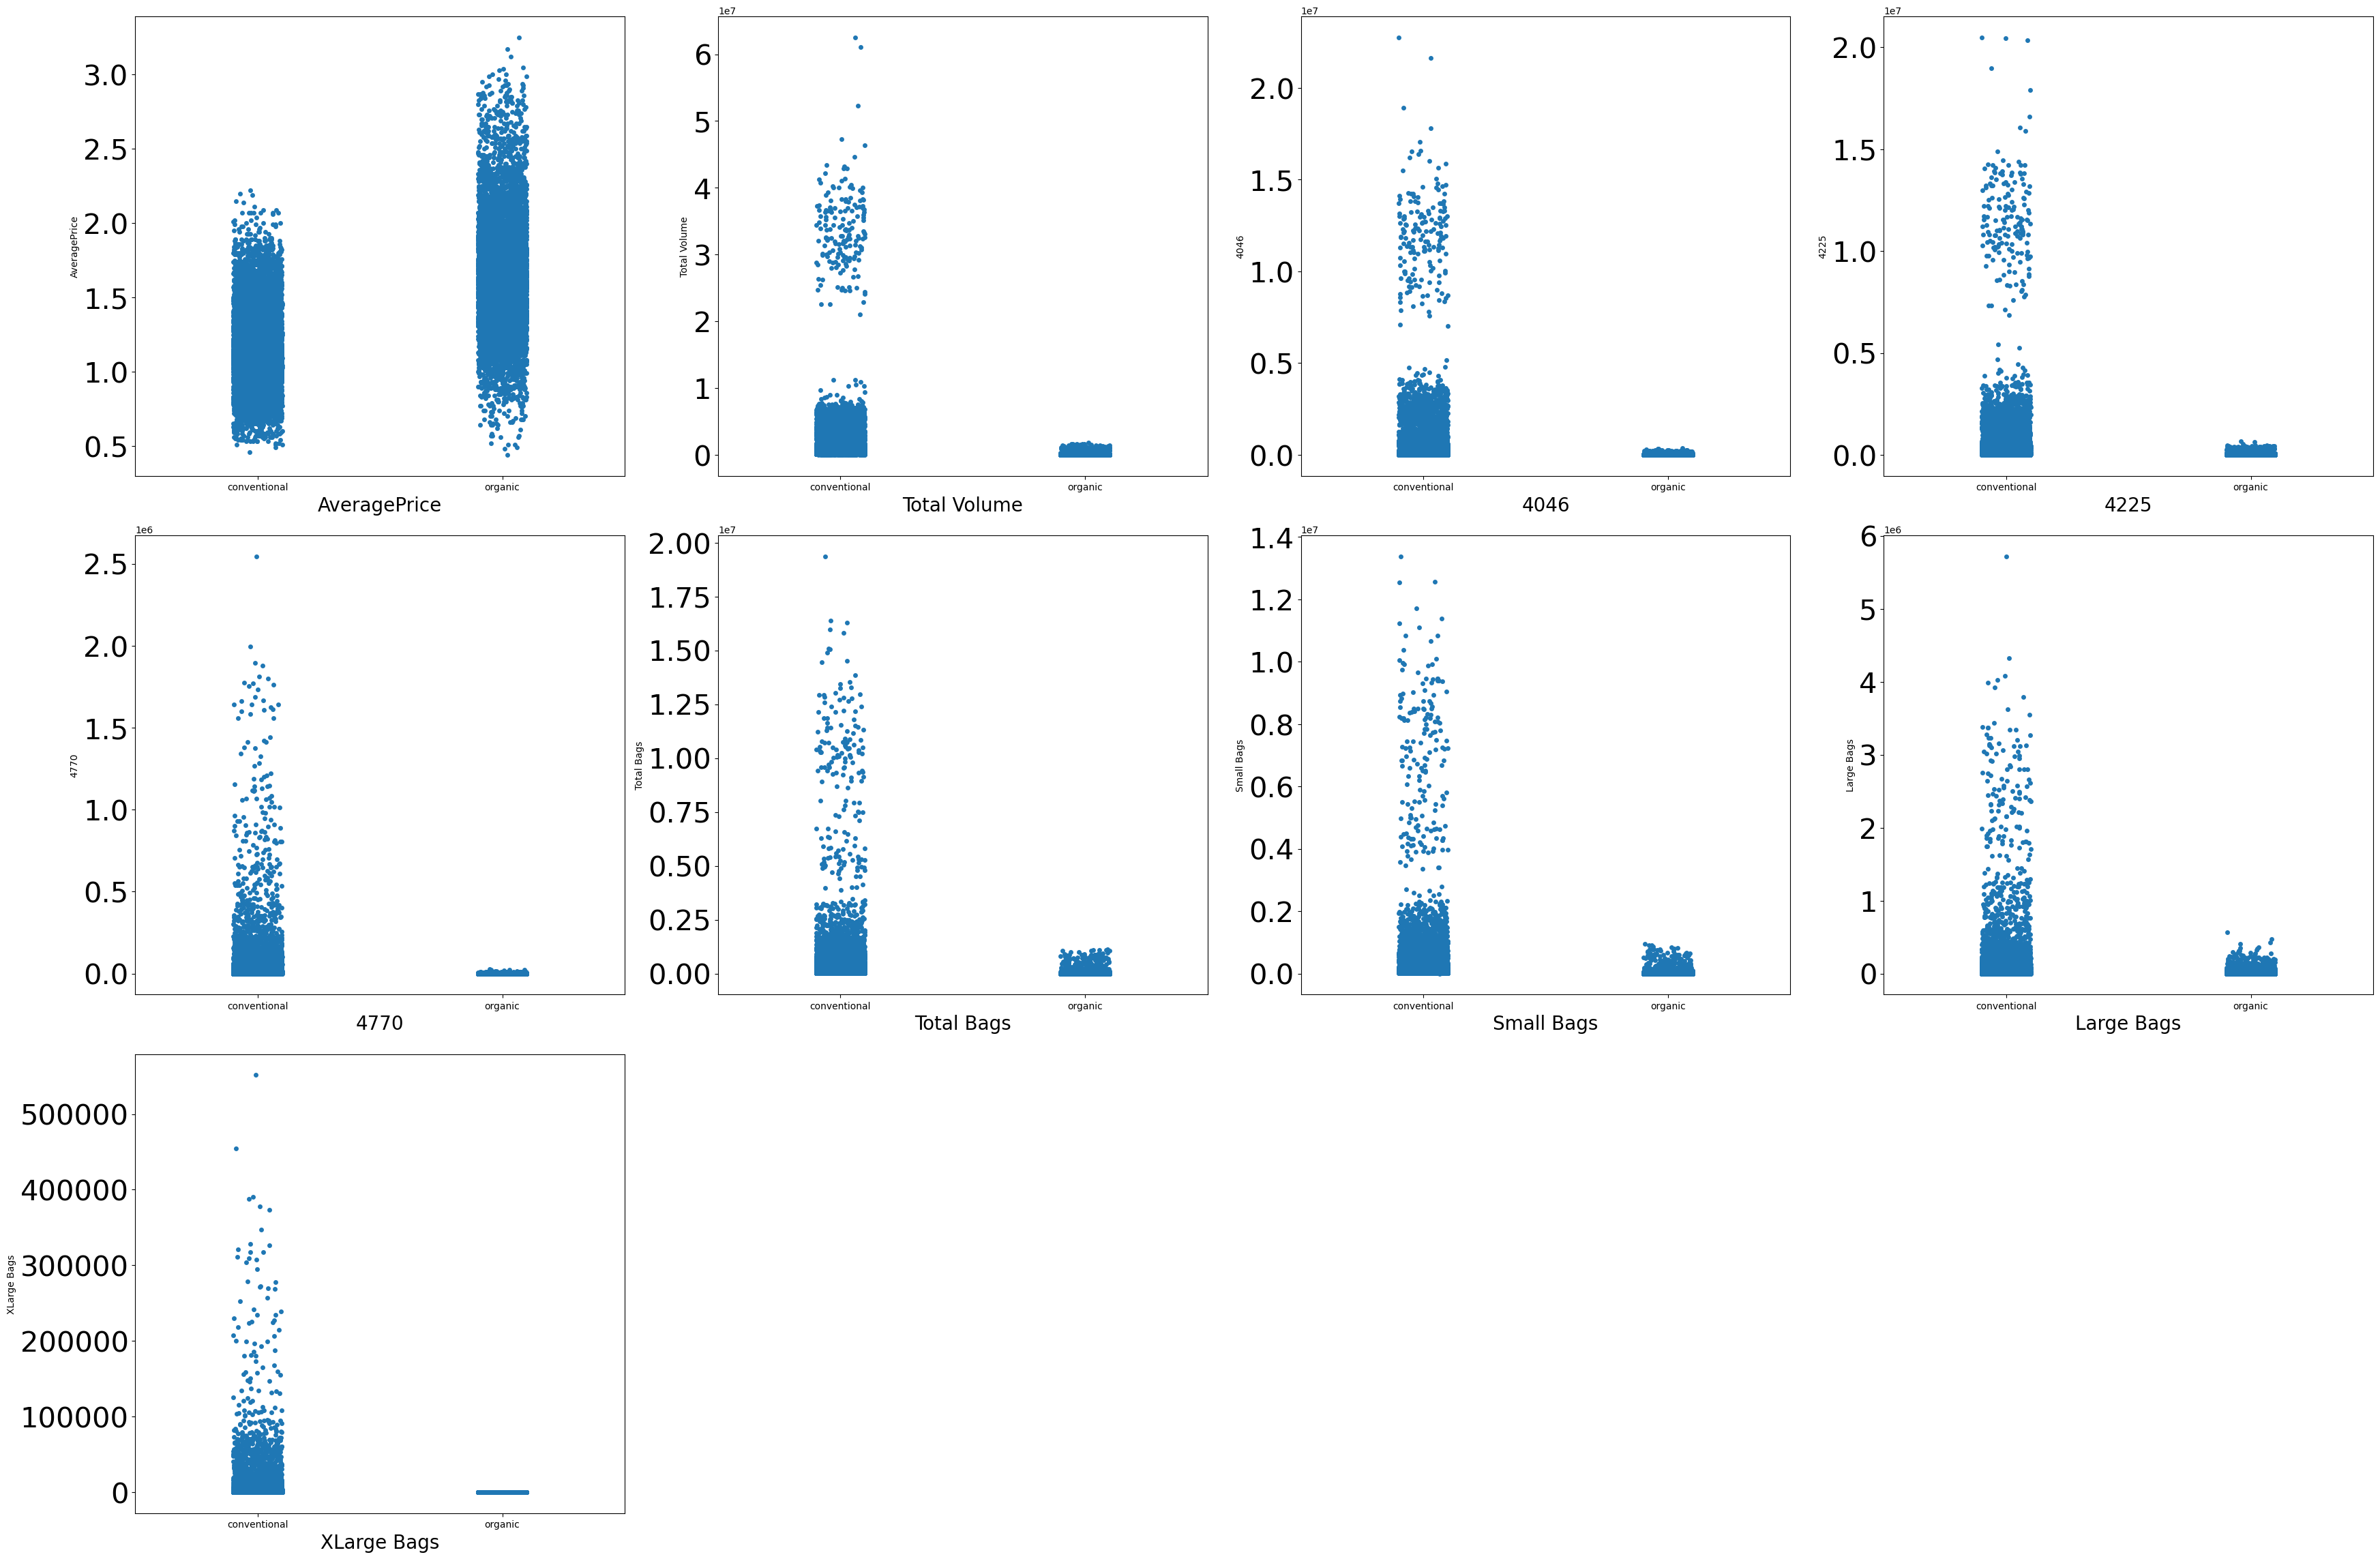

In [27]:
plt.figure(figsize=(35,30),facecolor='white')
plotnumber=1
for col in numeric_columns:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.stripplot(x='type',y=col,data=df)
        plt.xlabel(col, fontsize =20)
        plt.yticks(rotation=0, fontsize=30)
        
    plotnumber+=1
plt.tight_layout()

In [28]:
df.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

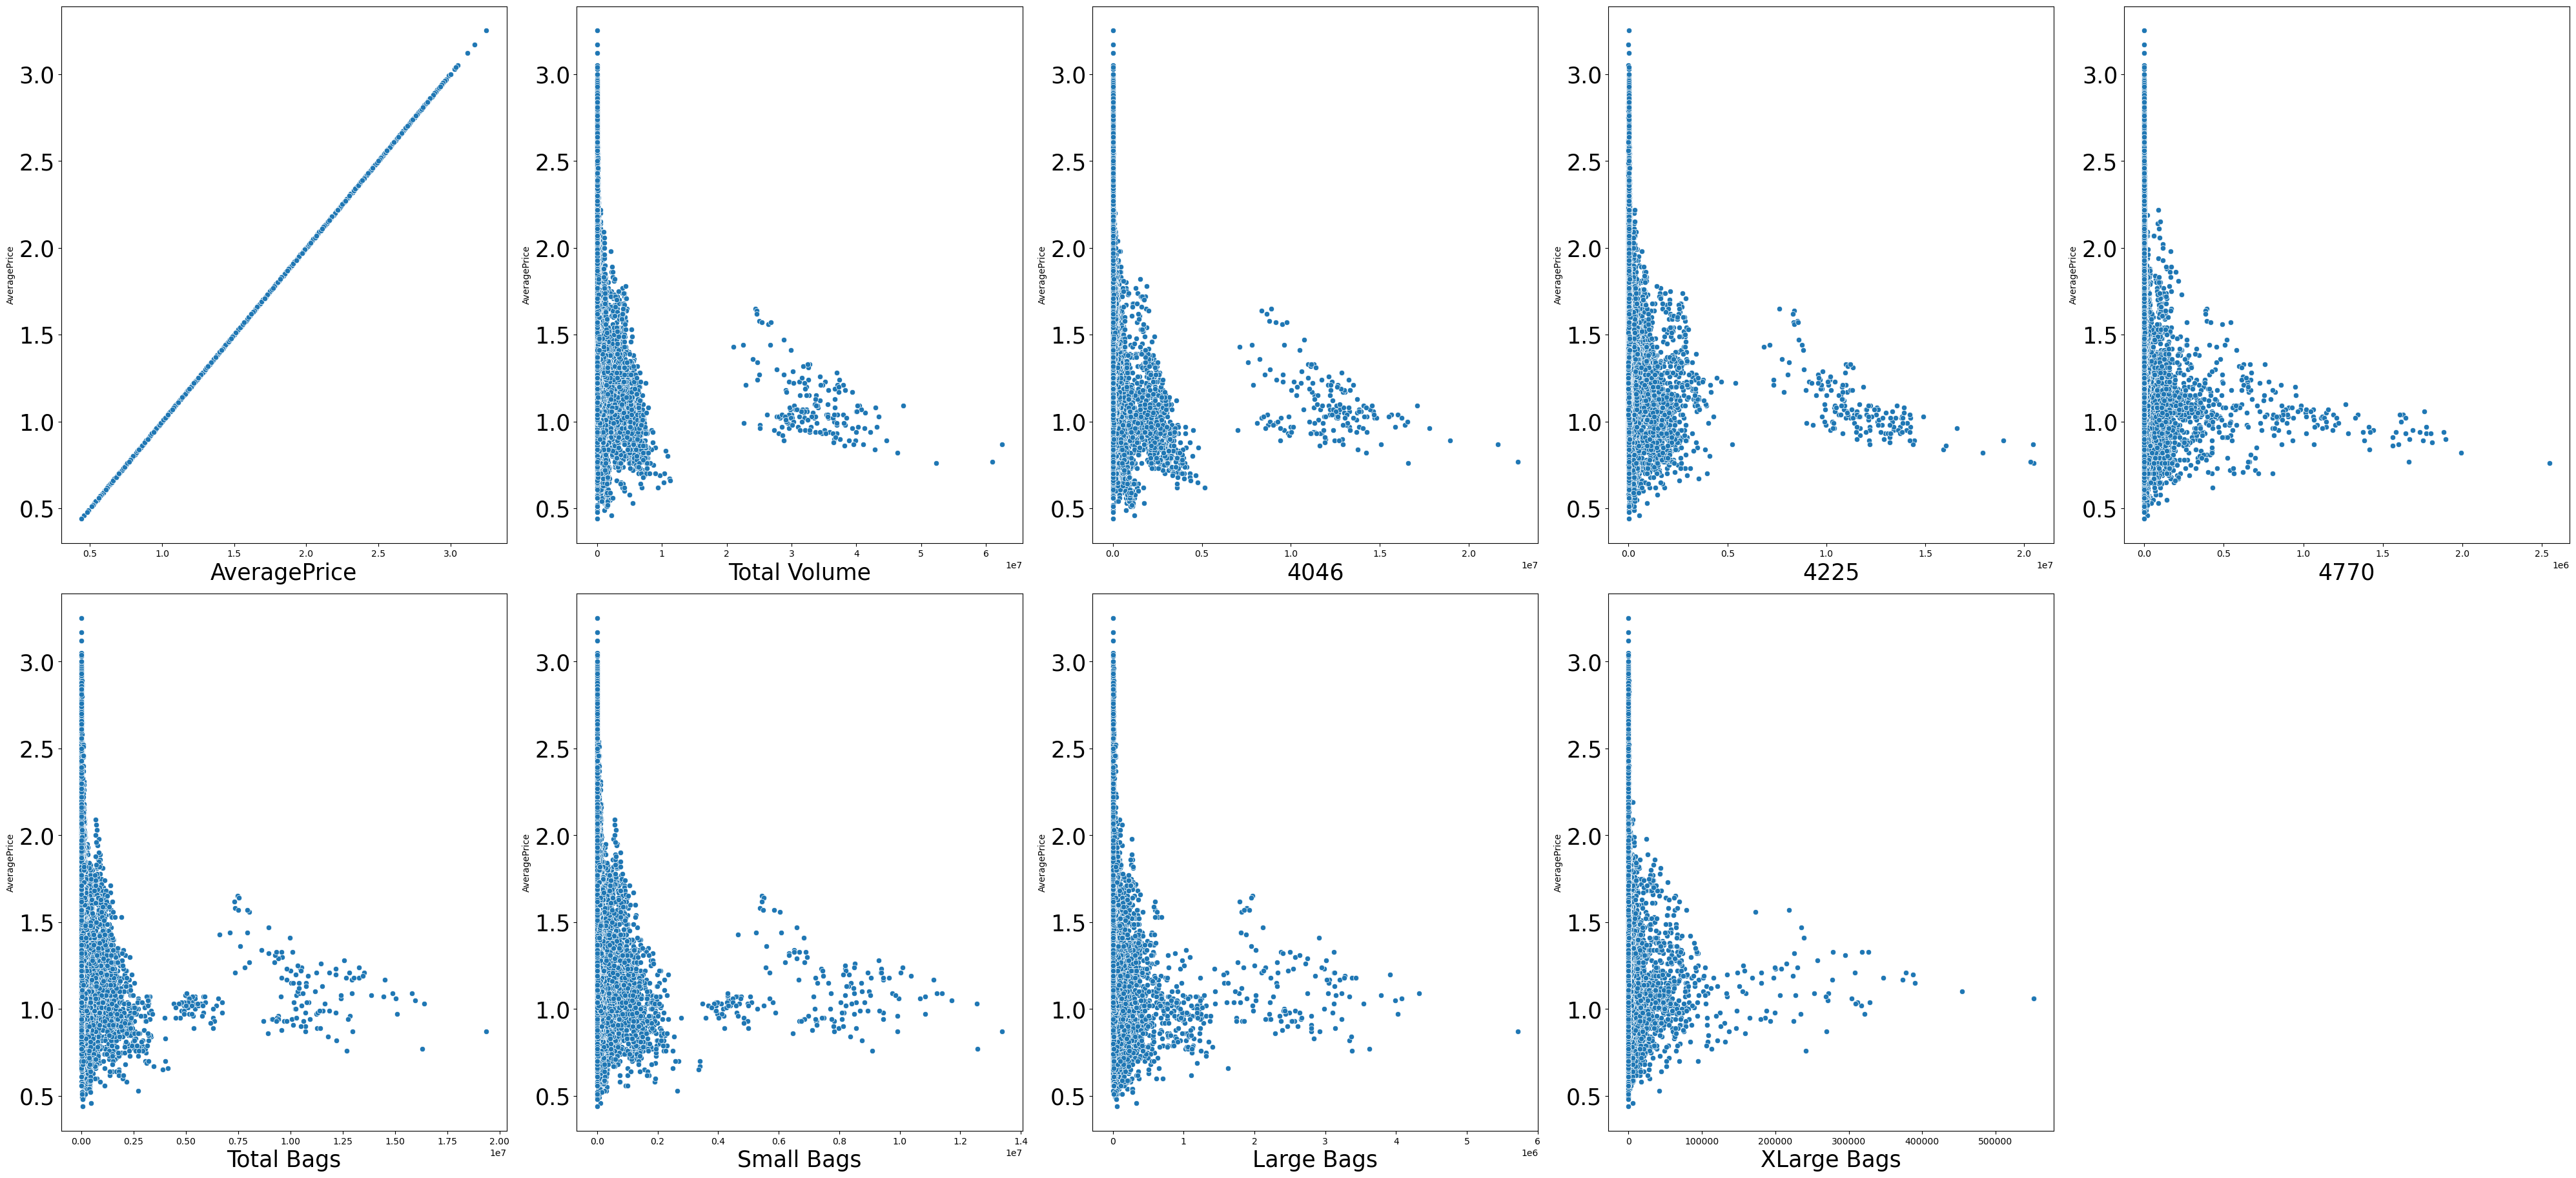

In [29]:
plt.figure(figsize=(40,45))
plotnumber=1
for col in numeric_columns:
    if plotnumber<=10:
        ax=plt.subplot(5,5, plotnumber)
        sns.scatterplot(x=col,y='AveragePrice',data=df)
        plt.xlabel(col, fontsize=25)
        plt.yticks(rotation=0,fontsize=25)
    plotnumber+=1
plt.tight_layout()

there is no such positive correlation between the 'AveragePrice and the features' it means if we will do changes in this features so it will not effect the 'AveragePrice'

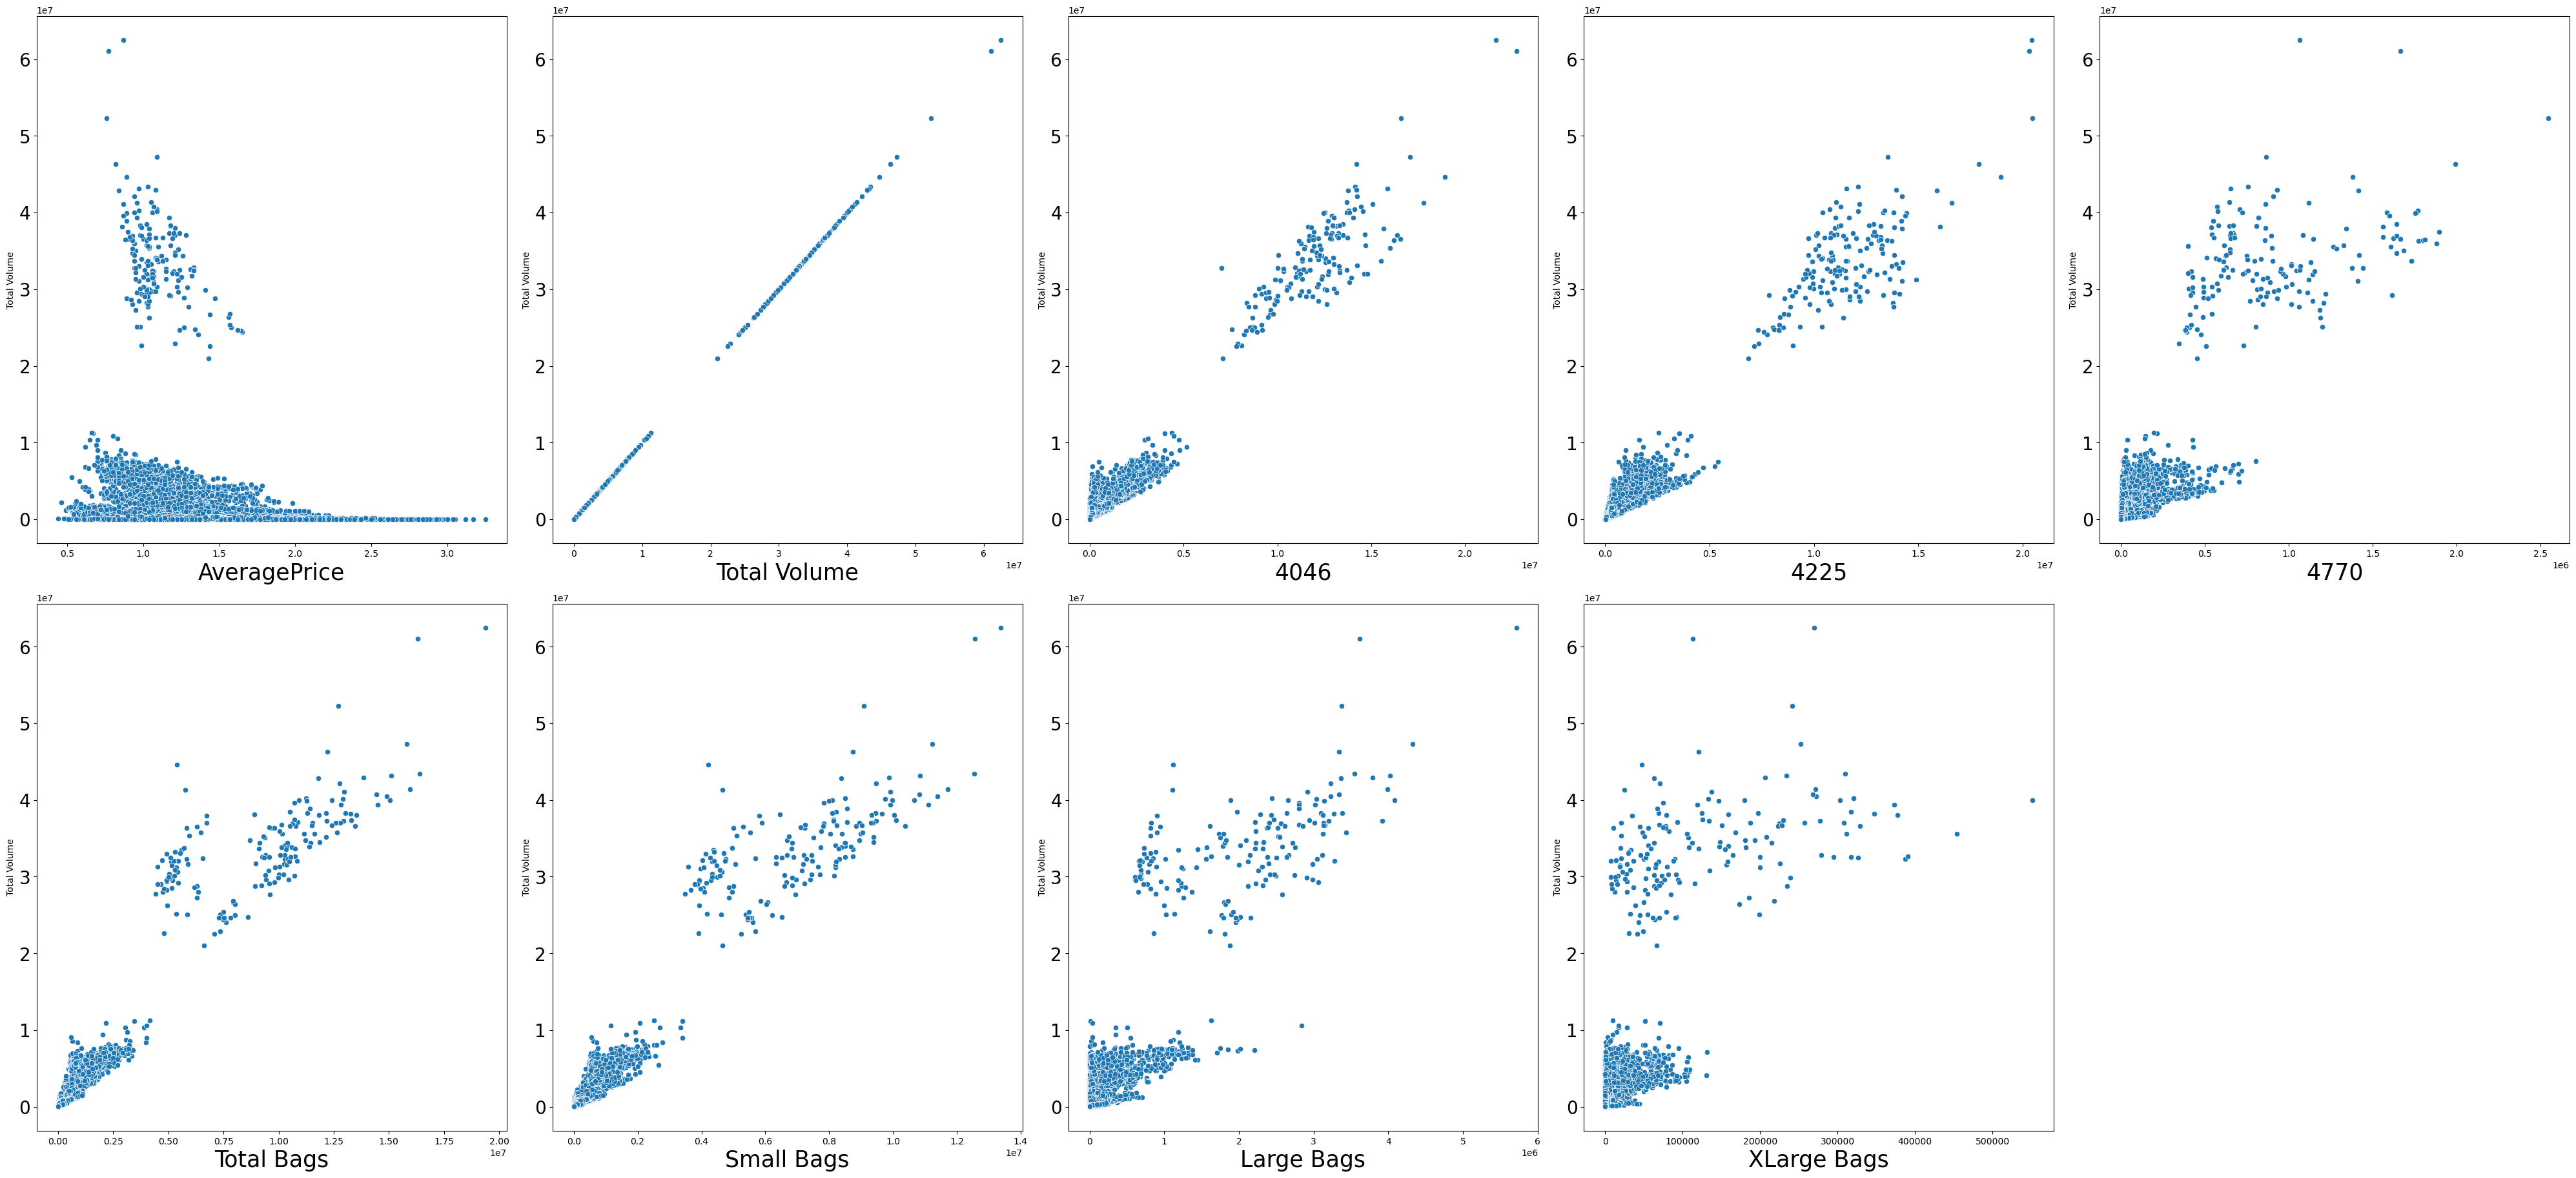

In [30]:
plt.figure(figsize=(40,45),facecolor='white')
plotnumber=1
for i in numeric_columns:
    if plotnumber<10:
        ax=plt.subplot(5,5,plotnumber)
        sns.scatterplot(x=i,y='Total Volume',data=df)
        plt.xlabel(i, fontsize=25)
        plt.yticks(rotation=0, fontsize=20)
    plotnumber+=1
plt.tight_layout()

there is no positive correlation between the 'Total Volume' and the other features 

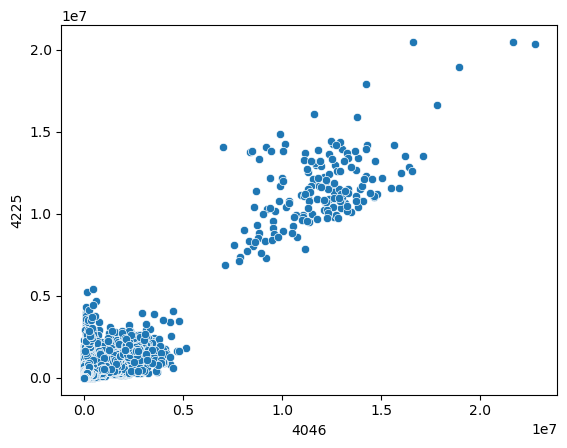

In [31]:
sns.scatterplot(x='4046',y='4225',data=df)
plt.show()

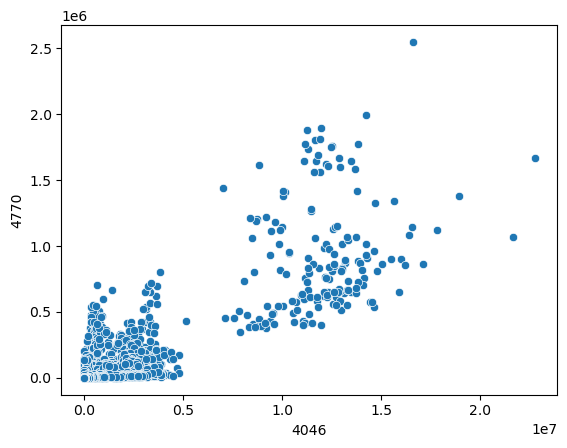

In [32]:
sns.scatterplot(x='4046',y='4770',data=df)
plt.show()

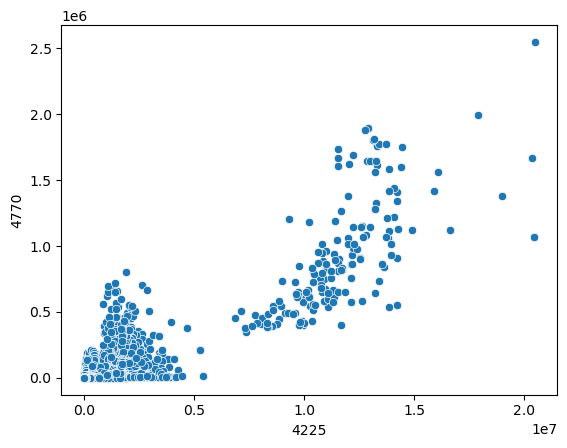

In [33]:
sns.scatterplot(x='4225',y='4770',data=df)
plt.show()

there is no positive correlation between the ('look up codes')

In [34]:
df.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [35]:
bags=['Total Bags','Small Bags','Large Bags','XLarge Bags']

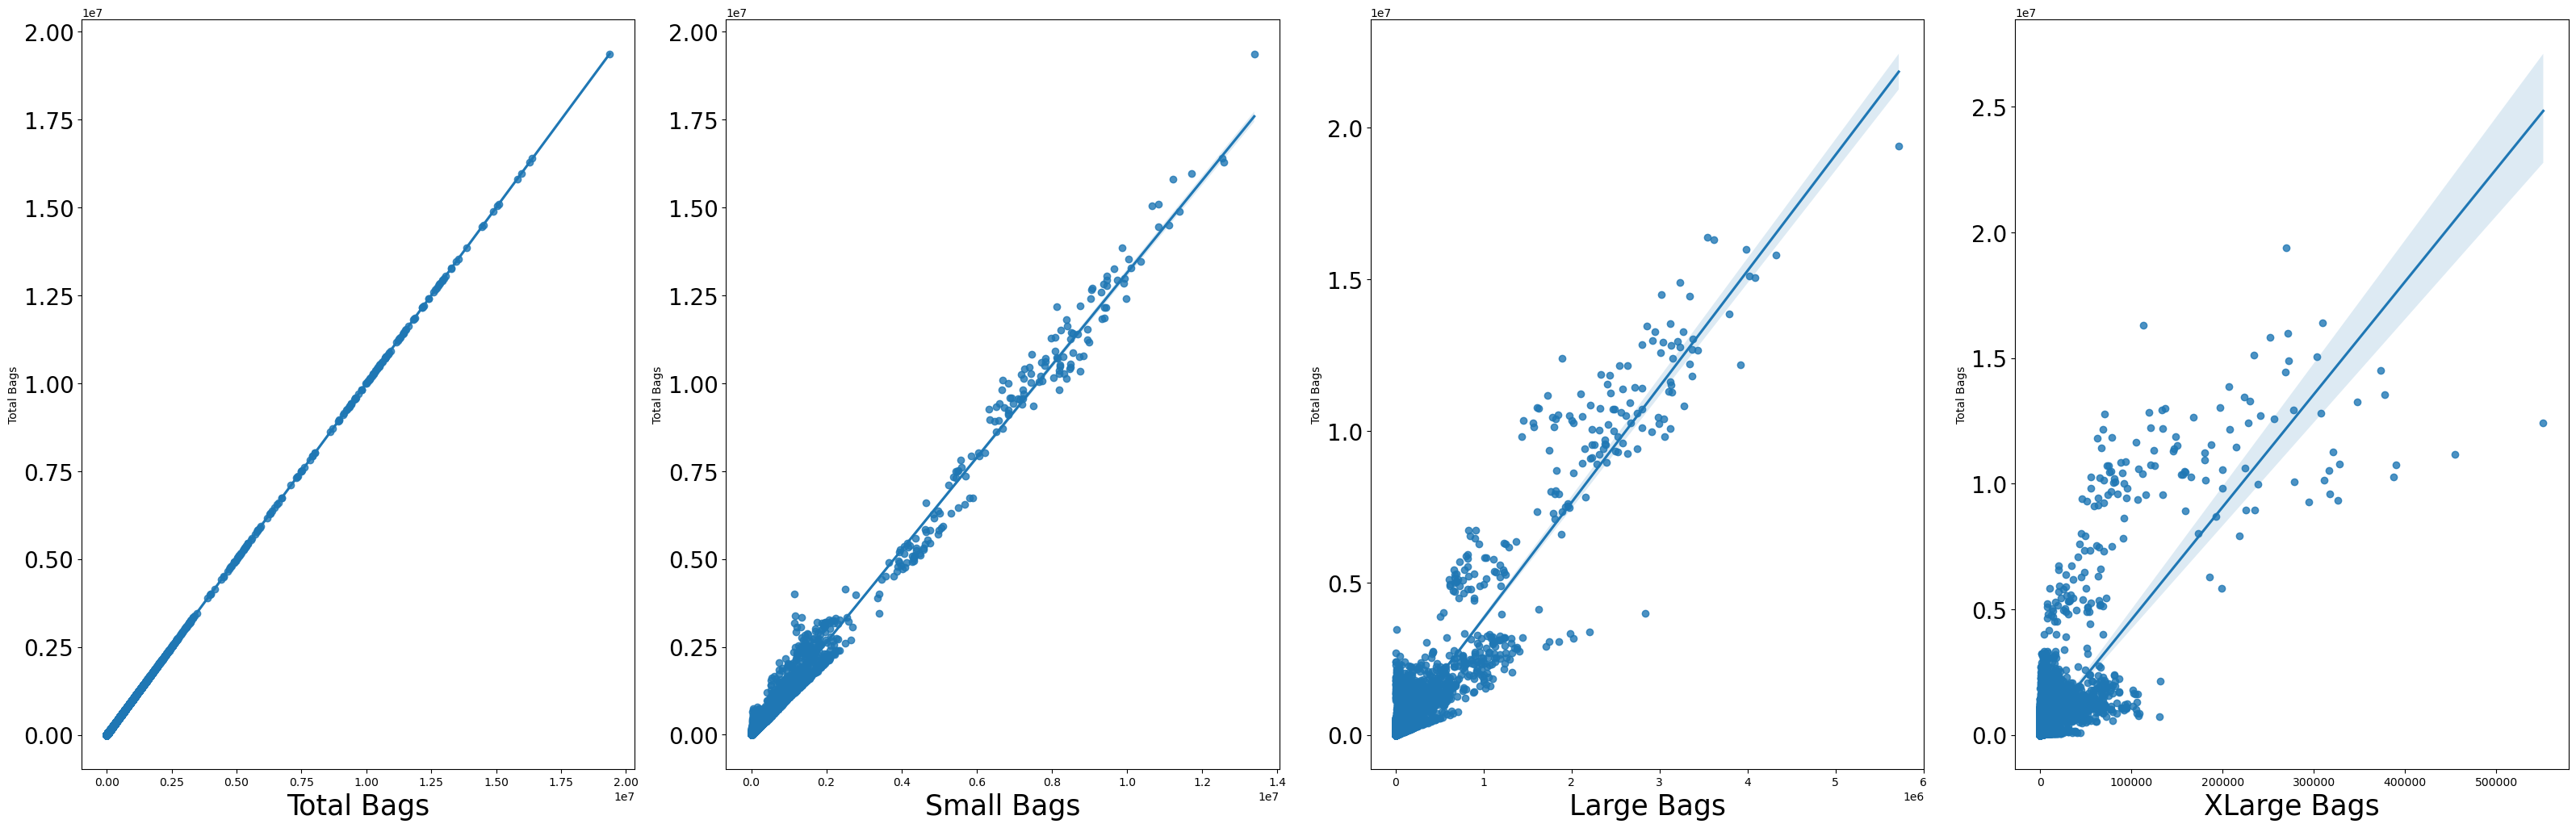

In [36]:
plt.figure(figsize=(40,50))
plotnumber=1
for i in bags:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.regplot(x=i,y='Total Bags',data=df)
        plt.xlabel(i, fontsize=25)
        plt.yticks(rotation=0, fontsize=20)
    plotnumber+=1
plt.tight_layout()

in the above regplot we can understand that the 'Small Bags','Large Bags','XLarge Bags' this 3 columns are highly positively  correlated with the 'Total Bags'

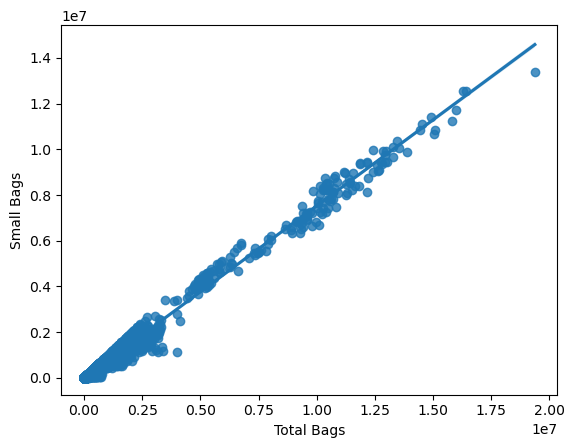

In [37]:
sns.regplot(x='Total Bags',y='Small Bags',data=df)
plt.show()

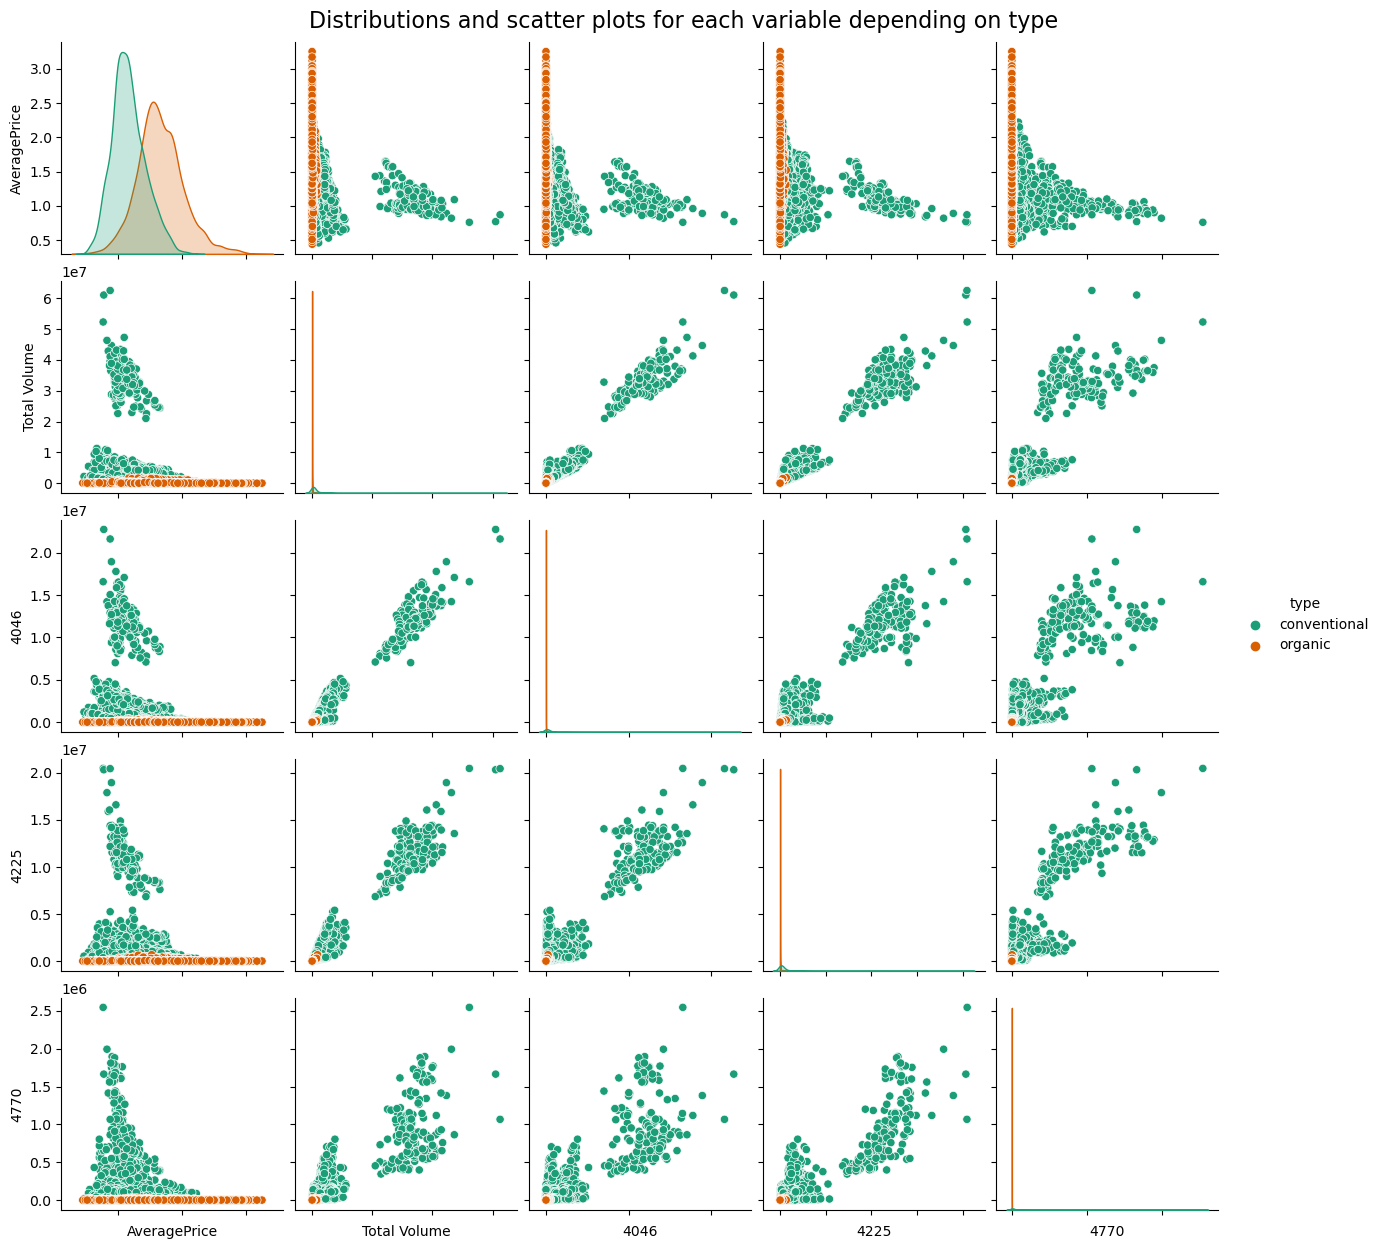

In [38]:
columns_for_research = ['AveragePrice','Total Volume','4046','4225','4770','type']
g = sns.pairplot(data=df[columns_for_research], hue='type',palette='Dark2')
g.fig.suptitle('Distributions and scatter plots for each variable depending on type', y=1.01, size=16)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

# Checking the outliers

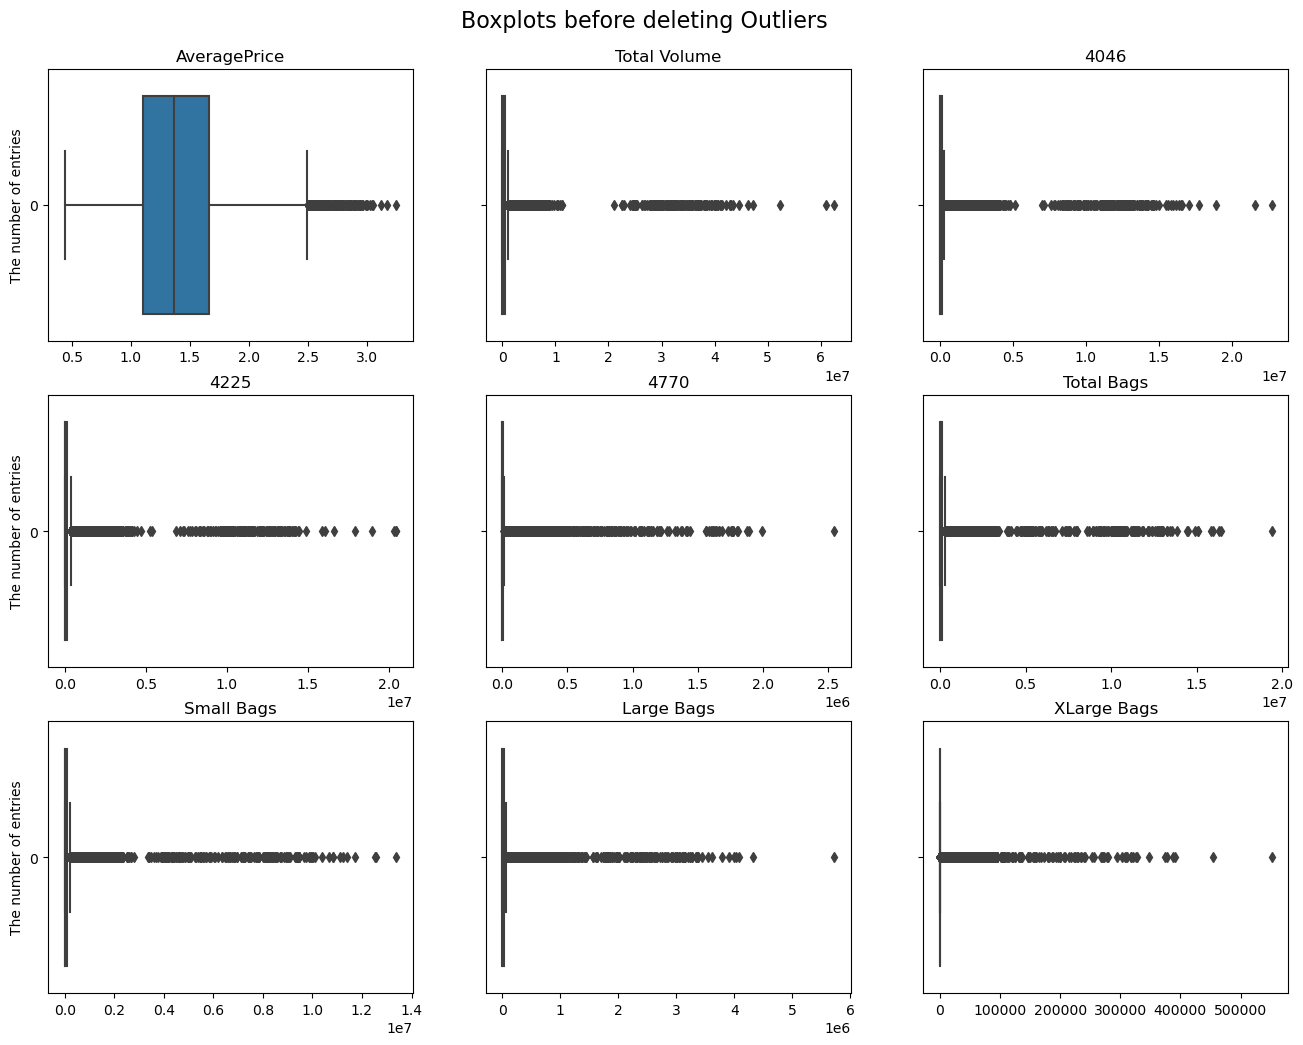

In [39]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle, y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots before deleting Outliers ')

In [40]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

For Skewed distributions we'll use inter-Quartile Range (IOR) proximity rule.

In [41]:
# deleting outliers
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n', IQR)

df_filtered = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df_filtered.shape)


Here we will get IQR for each column
 AveragePrice         0.56
Total Volume    422123.71
4046            110166.13
4225            147198.08
4770              6243.42
Total Bags      105694.73
Small Bags       80488.25
Large Bags       21901.78
XLarge Bags        132.50
dtype: float64


(11538, 14)

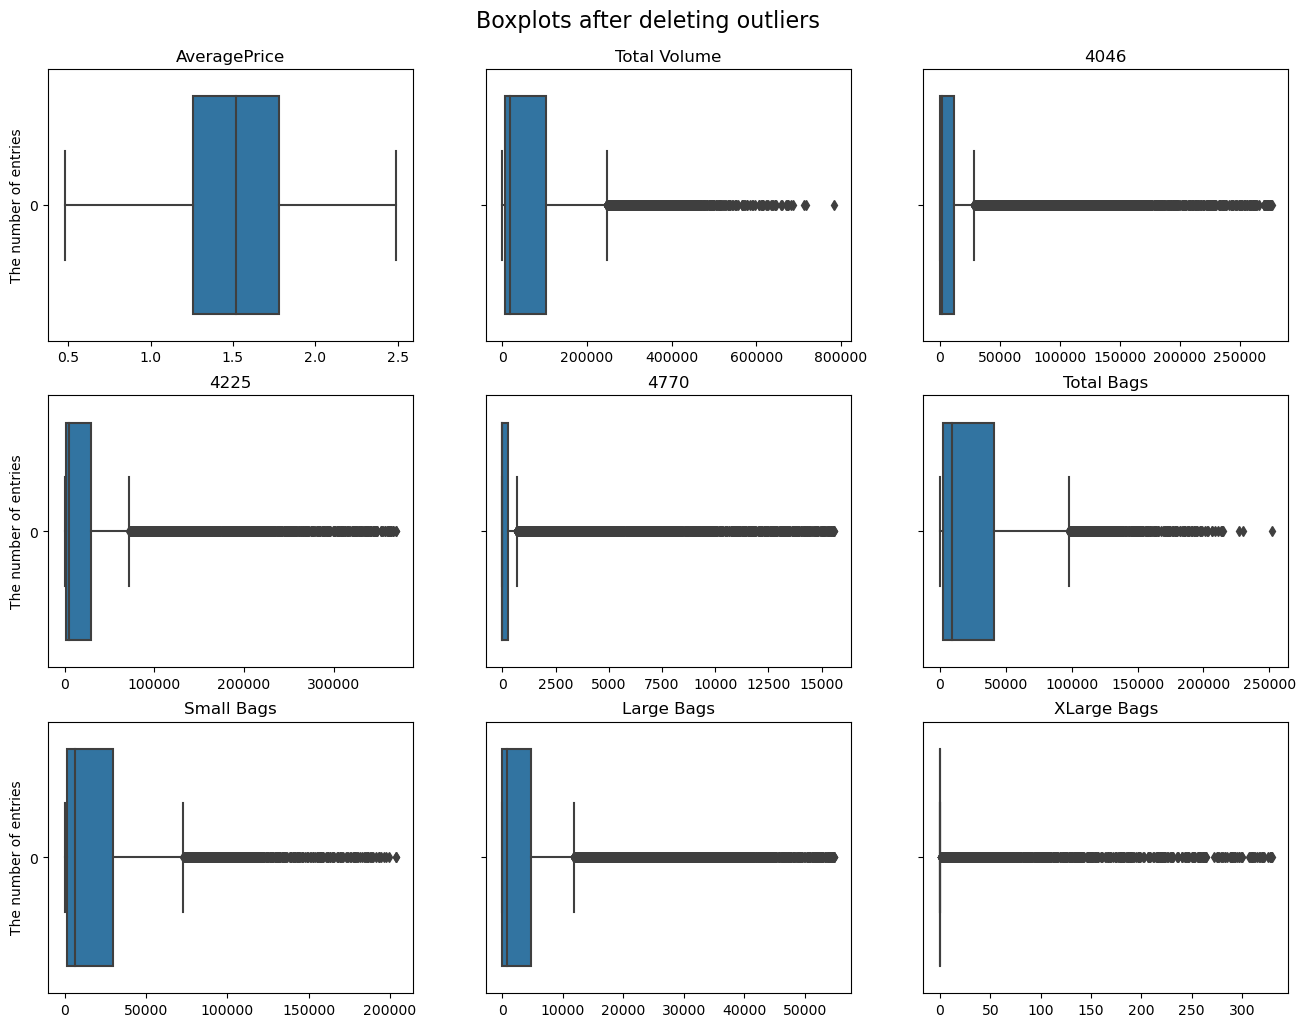

In [42]:
boxplots_custom(dataset=df_filtered,columns_list=numeric_columns,rows=3, cols=3, suptitle='Boxplots after deleting outliers')

Looks much better now! but nevertheless we see some outliers even in filtered data. it will be great to scale the features at the step of building model. we'll use filtered data further.


# making additional columns to filtered data

we already have information about day and year of price scanning, nor let's add additional columns for the further cohort research 

In [43]:
df_filtered['month'] = df_filtered['Date'].astype('datetime64[M]')
df_filtered['week'] = df_filtered['Date'] .astype('datetime64[W]')
bins = [0.48, 1.52, 1.78, 1.9, 2.49]
labels = ['low','mean','high','expensive']
df_filtered['price_types'] = pd.cut(df['AveragePrice'], bins=bins, labels=labels)
df_filtered.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region      month       week price_types  
0  2015  Albany 2015-12-27 2015-12-27         low  
1  2015  Albany 2015-12-20 2015-12-20         low  
2  2015  Albany 2015-12-13 2015-12-13         low  
3  2015  Albany 2015-12-06 2015-12-06         low  
4  2015  Albany 2015-11-29 2015-11-29         low

numeric columns histograms

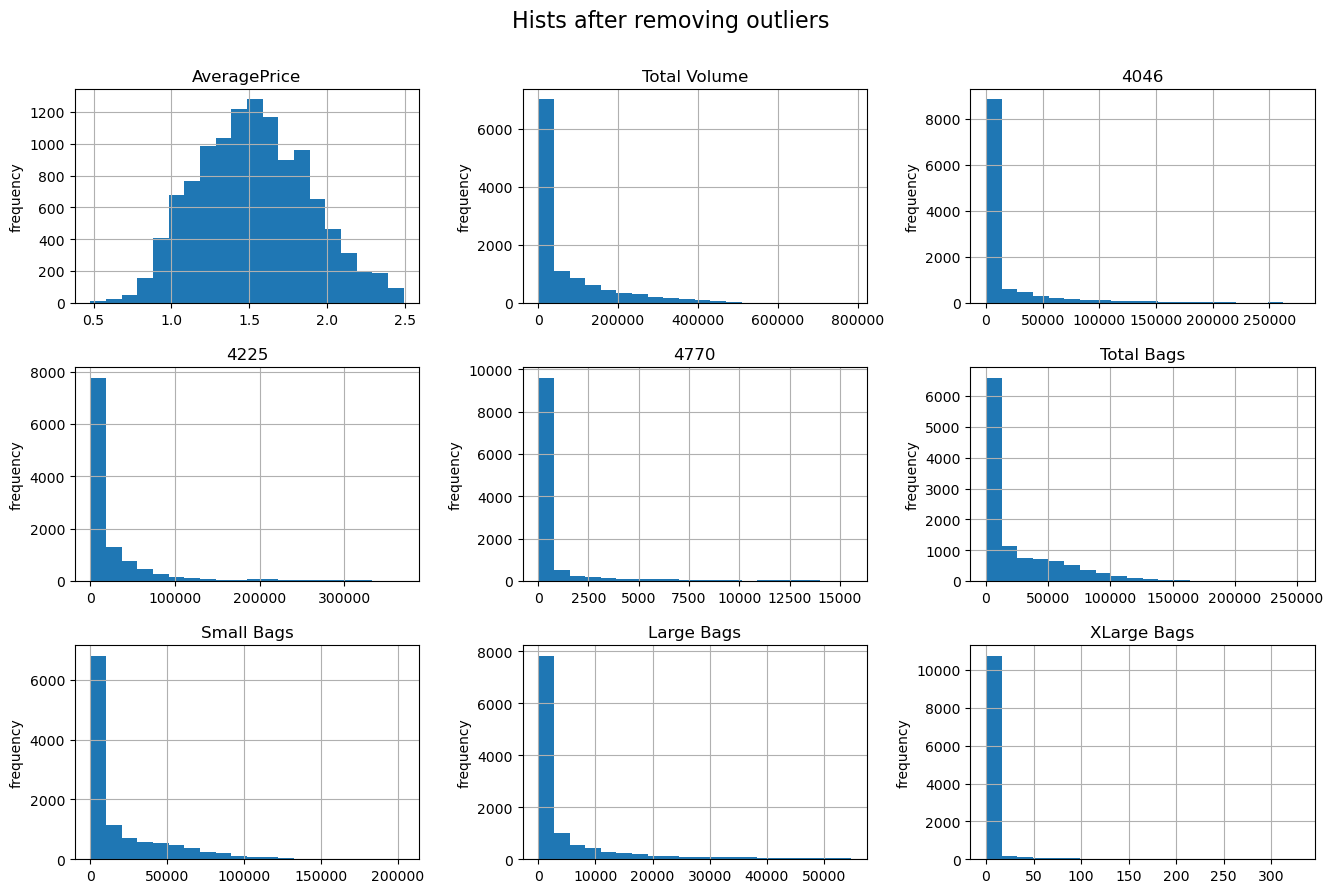

In [44]:
# histograms

param_graphs = df_filtered.hist(numeric_columns, figsize=(16, 10), bins=20)
plt.suptitle('Hists after removing outliers ', y=0.96, size=16)
for axis in param_graphs.flatten():
    axis.set_ylabel('frequency')
plt.show()

Distributions and scatter plot for each variable according to type variable

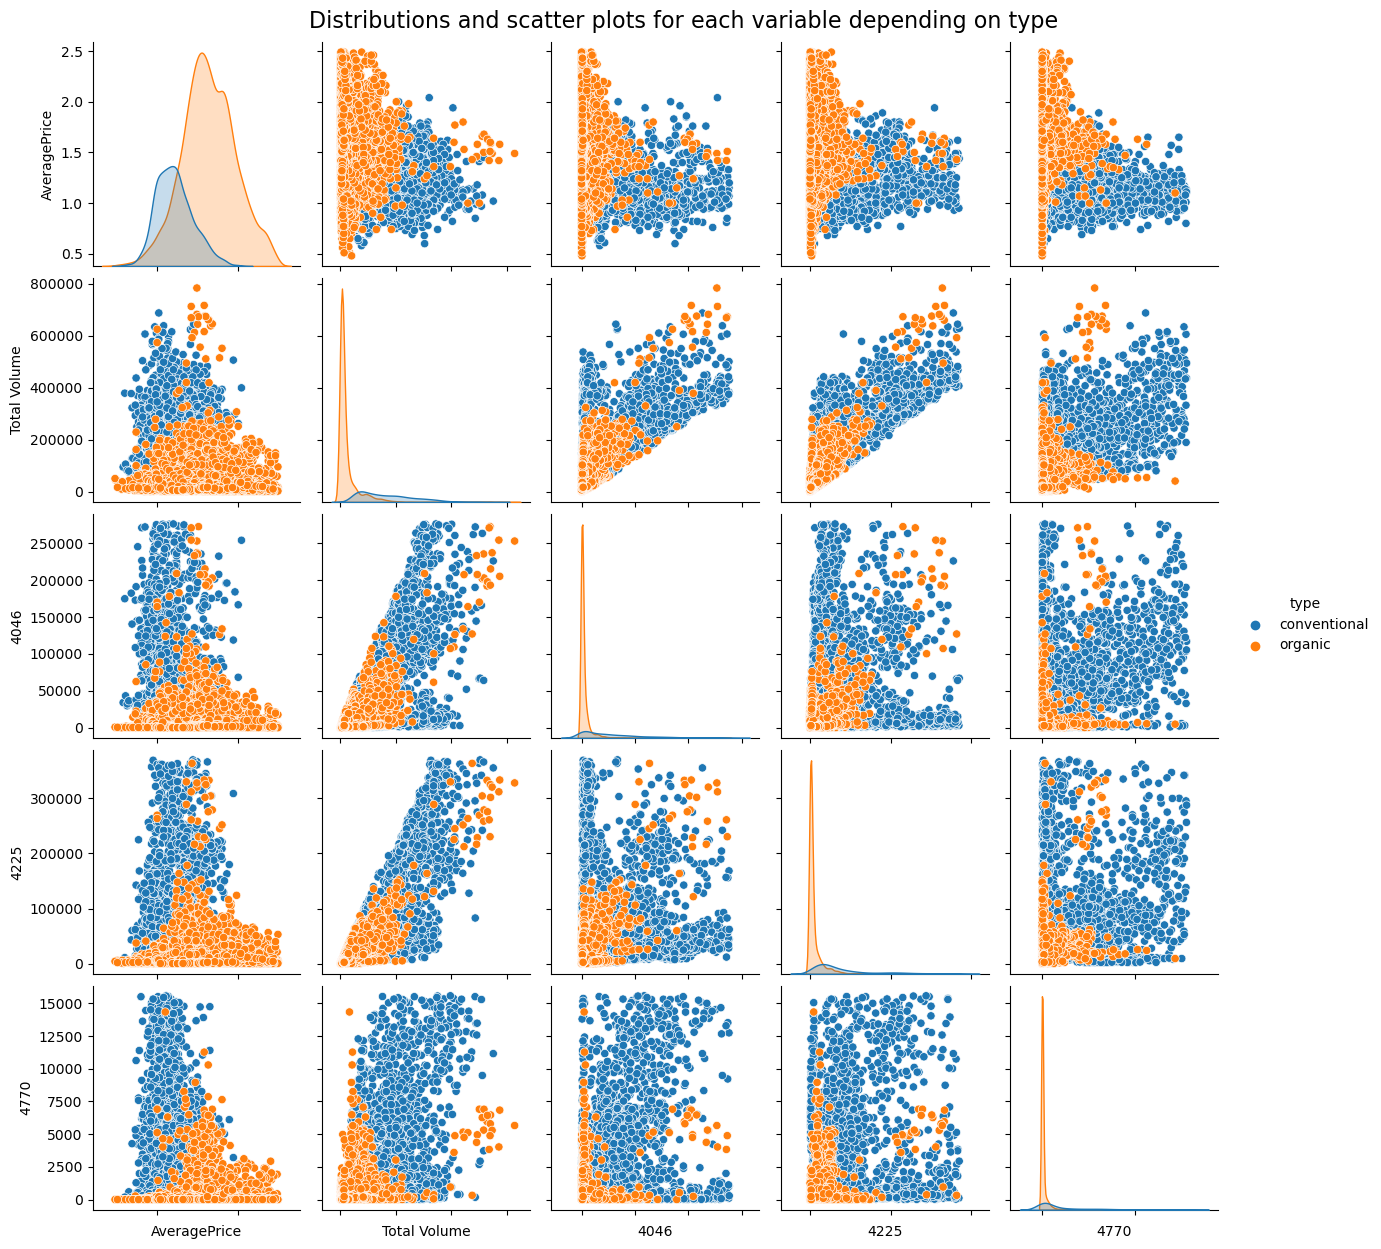

In [45]:
columns_for_research = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type']
g = sns.pairplot(data=df_filtered[columns_for_research], hue='type')
g.fig.suptitle('Distributions and scatter plots for each variable depending on type', y=1.01, size=16)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

# Calculating the correlation matrix

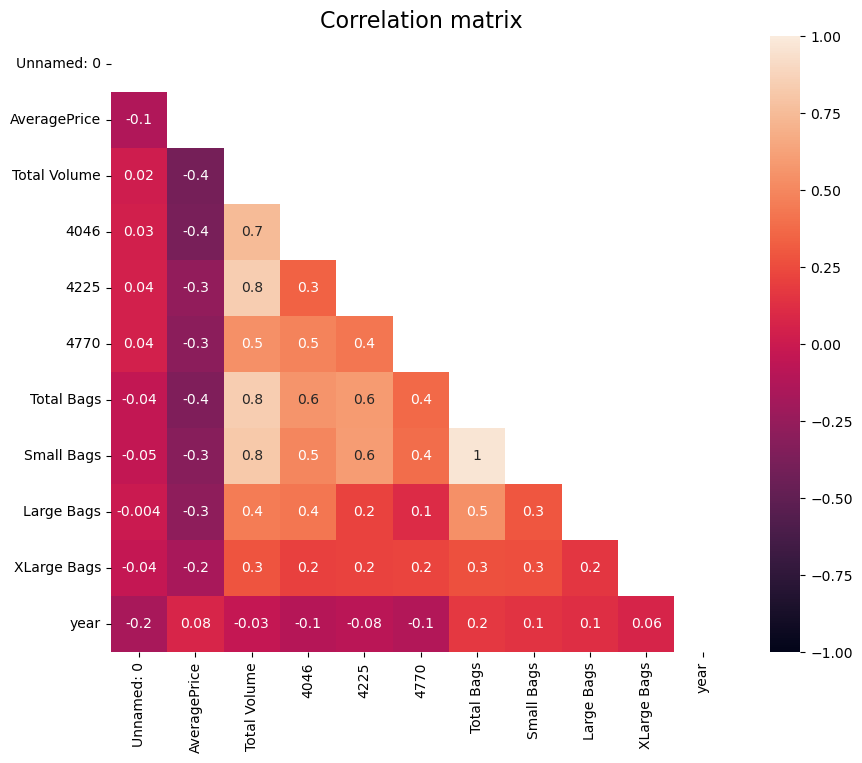

In [46]:
corr = df_filtered.corr()

matrix = np.triu(corr)
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True, mask = matrix)
plt.title('Correlation matrix',size=16)
plt.show()

In [47]:
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.076743
Unnamed: 0     -0.130311
XLarge Bags    -0.171026
4225           -0.265976
Large Bags     -0.287150
4770           -0.304410
Small Bags     -0.314898
Total Bags     -0.358109
4046           -0.384518
Total Volume   -0.405764
Name: AveragePrice, dtype: float64

In [48]:
imp=SimpleImputer(strategy='most_frequent')
df_filtered['price_types']=imp.fit_transform(df_filtered['price_types'].values.reshape(-1,1))


df_filtered

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region      month       week price_types  
0      2015            Albany 2015-12-27 2015-12-27         low  
1      2015            Albany 2015-12-20 2015-12-20         low  
2      2015            Albany 2015-12-13 2015-12-13         low  
3      2015            Albany 2015-12-06 2015-12-06         low  
4      2015            Albany 2015-11-29 2015-11-29         low  
...     ...               ...        ...        ...         ...  
18244  2018  WestTexNewMexico 2018-02-04 2018-02-04        mean  
18245  2018  WestTexNewMexico 2018-01-28 2018-01-28        mean  
18246  2018  WestTexNewMexico 2018-01-21 2018-01-21        high  
18247  2018  WestTexNewMexico 2018-01-14 2018-01-14   expensive  
18248  2018  WestTexNewMexico 2018-01-07 2018-01-07        mean  

[11538 rows x 17 columns]

In [49]:
df_filtered.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
week            0
price_types     0
dtype: int64

here we have filled the null values in the price_types feature using SimpleImputer.

# Encoding categorical columns

In [50]:
df_filtered.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region      month       week price_types  
0  2015  Albany 2015-12-27 2015-12-27         low  
1  2015  Albany 2015-12-20 2015-12-20         low  
2  2015  Albany 2015-12-13 2015-12-13         low  
3  2015  Albany 2015-12-06 2015-12-06         low  
4  2015  Albany 2015-11-29 2015-11-29         low

In [51]:
ED=OrdinalEncoder()

In [52]:
for i in df_filtered.columns:
    if df_filtered.dtypes[i]=='object':
        df_filtered[i]=ED.fit_transform(df_filtered[i].values.reshape(-1,1))
        
df
for i in df_filtered.columns:
    if df_filtered.dtypes[i]=='datetime64[ns]':
        df_filtered[i]=ED.fit_transform(df_filtered[i].values.reshape(-1,1))
        
        
for i in df_filtered.columns:
    if df_filtered.dtypes[i]=='category':
        df_filtered[i]=ED.fit_transform(df_filtered[i].values.reshape(-1,1))
        
df_filtered

Unnamed: 0   Date  AveragePrice  Total Volume     4046       4225  \
0               0   51.0          1.33      64236.62  1036.74   54454.85   
1               1   50.0          1.35      54876.98   674.28   44638.81   
2               2   49.0          0.93     118220.22   794.70  109149.67   
3               3   48.0          1.08      78992.15  1132.00   71976.41   
4               4   47.0          1.28      51039.60   941.48   43838.39   
...           ...    ...           ...           ...      ...        ...   
18244           7  161.0          1.63      17074.83  2046.96    1529.20   
18245           8  160.0          1.71      13888.04  1191.70    3431.50   
18246           9  159.0          1.87      13766.76  1191.92    2452.79   
18247          10  158.0          1.93      16205.22  1527.63    2981.04   
18248          11  157.0          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
0       48.16     8696.87     8603.62       93.25          0.0   0.0  2015   
1       58.33     9505.56     9408.07       97.49          0.0   0.0  2015   
2      130.50     8145.35     8042.21      103.14          0.0   0.0  2015   
3       72.58     5811.16     5677.40      133.76          0.0   0.0  2015   
4       75.78     6183.95     5986.26      197.69          0.0   0.0  2015   
...       ...         ...         ...         ...          ...   ...   ...   
18244    0.00    13498.67    13066.82      431.85          0.0   1.0  2018   
18245    0.00     9264.84     8940.04      324.80          0.0   1.0  2018   
18246  727.94     9394.11     9351.80       42.31          0.0   1.0  2018   
18247  727.01    10969.54    10919.54       50.00          0.0   1.0  2018   
18248  224.53    12014.15    11988.14       26.01          0.0   1.0  2018   

       region  month   week  price_types  
0         0.0   51.0   51.0          2.0  
1         0.0   50.0   50.0          2.0  
2         0.0   49.0   49.0          2.0  
3         0.0   48.0   48.0          2.0  
4         0.0   47.0   47.0          2.0  
...       ...    ...    ...          ...  
18244    53.0  161.0  161.0          3.0  
18245    53.0  160.0  160.0          3.0  
18246    53.0  159.0  159.0          1.0  
18247    53.0  158.0  158.0          0.0  
18248    53.0  157.0  157.0          3.0  

[11538 rows x 17 columns]

here we have transformed the categorical columns into the numerical columns.

let.s drop the Unnamed column because we have no use of this column it is an unneccessary column.

In [53]:
df_filtered=df_filtered.drop(['Unnamed: 0','month','week'],axis=1)
df_filtered.head()

Date  AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0  51.0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1  50.0          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2  49.0          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3  48.0          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4  47.0          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  price_types  
0     8603.62       93.25          0.0   0.0  2015     0.0          2.0  
1     9408.07       97.49          0.0   0.0  2015     0.0          2.0  
2     8042.21      103.14          0.0   0.0  2015     0.0          2.0  
3     5677.40      133.76          0.0   0.0  2015     0.0          2.0  
4     5986.26      197.69          0.0   0.0  2015     0.0          2.0

In [54]:
df_filtered.dtypes

Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region          float64
price_types     float64
dtype: object

as we can see right now all the features datatype is numerical datatype from the object

In [55]:

df_filtered

Date  AveragePrice  Total Volume     4046       4225    4770  \
0       51.0          1.33      64236.62  1036.74   54454.85   48.16   
1       50.0          1.35      54876.98   674.28   44638.81   58.33   
2       49.0          0.93     118220.22   794.70  109149.67  130.50   
3       48.0          1.08      78992.15  1132.00   71976.41   72.58   
4       47.0          1.28      51039.60   941.48   43838.39   75.78   
...      ...           ...           ...      ...        ...     ...   
18244  161.0          1.63      17074.83  2046.96    1529.20    0.00   
18245  160.0          1.71      13888.04  1191.70    3431.50    0.00   
18246  159.0          1.87      13766.76  1191.92    2452.79  727.94   
18247  158.0          1.93      16205.22  1527.63    2981.04  727.01   
18248  157.0          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  \
0         8696.87     8603.62       93.25          0.0   0.0  2015     0.0   
1         9505.56     9408.07       97.49          0.0   0.0  2015     0.0   
2         8145.35     8042.21      103.14          0.0   0.0  2015     0.0   
3         5811.16     5677.40      133.76          0.0   0.0  2015     0.0   
4         6183.95     5986.26      197.69          0.0   0.0  2015     0.0   
...           ...         ...         ...          ...   ...   ...     ...   
18244    13498.67    13066.82      431.85          0.0   1.0  2018    53.0   
18245     9264.84     8940.04      324.80          0.0   1.0  2018    53.0   
18246     9394.11     9351.80       42.31          0.0   1.0  2018    53.0   
18247    10969.54    10919.54       50.00          0.0   1.0  2018    53.0   
18248    12014.15    11988.14       26.01          0.0   1.0  2018    53.0   

       price_types  
0              2.0  
1              2.0  
2              2.0  
3              2.0  
4              2.0  
...            ...  
18244          3.0  
18245          3.0  
18246          1.0  
18247          0.0  
18248          3.0  

[11538 rows x 14 columns]

# separating features and label 

In [56]:
x=df_filtered.drop('region',axis=1)
y=df_filtered['region']

In [57]:
x.shape
#df_filtered.shape

(11538, 13)

# Feature Scaling using Standard Scaler

In [58]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

Date  AveragePrice  Total Volume      4046      4225      4770  \
0     -0.604984     -0.560680     -0.089681 -0.427319  0.470878 -0.338219   
1     -0.625252     -0.504577     -0.176013 -0.435912  0.294088 -0.333913   
2     -0.645520     -1.682741      0.408257 -0.433057  1.455950 -0.303355   
3     -0.665788     -1.261968      0.046422 -0.425060  0.786447 -0.327880   
4     -0.686056     -0.700938     -0.211408 -0.429577  0.279672 -0.326525   
...         ...           ...           ...       ...       ...       ...   
11533  1.624480      0.280865     -0.524695 -0.403366 -0.482331 -0.358611   
11534  1.604212      0.505277     -0.554089 -0.423644 -0.448070 -0.358611   
11535  1.583944      0.954102     -0.555208 -0.423639 -0.465697 -0.050390   
11536  1.563676      1.122411     -0.532716 -0.415680 -0.456183 -0.050784   
11537  1.543408      0.252814     -0.520869 -0.383265 -0.467438 -0.263542   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year  \
0       -0.496785   -0.400388   -0.512184    -0.212099 -1.723090 -1.151294   
1       -0.473214   -0.373732   -0.511746    -0.212099 -1.723090 -1.151294   
2       -0.512860   -0.418991   -0.511162    -0.212099 -1.723090 -1.151294   
3       -0.580895   -0.497352   -0.507996    -0.212099 -1.723090 -1.151294   
4       -0.570029   -0.487117   -0.501386    -0.212099 -1.723090 -1.151294   
...           ...         ...         ...          ...       ...       ...   
11533   -0.356828   -0.252496   -0.477175    -0.212099  0.580353  2.030160   
11534   -0.480231   -0.389241   -0.488243    -0.212099  0.580353  2.030160   
11535   -0.476463   -0.375597   -0.517451    -0.212099  0.580353  2.030160   
11536   -0.430544   -0.323648   -0.516656    -0.212099  0.580353  2.030160   
11537   -0.400097   -0.288239   -0.519137    -0.212099  0.580353  2.030160   

       price_types  
0         0.161558  
1         0.161558  
2         0.161558  
3         0.161558  
4         0.161558  
...            ...  
11533     1.200607  
11534     1.200607  
11535    -0.877492  
11536    -1.916541  
11537     1.200607  

[11538 rows x 13 columns]

here we have scaled the data to avoid the issue of biasness

# Checking variance_inflation_factor value

In [59]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF VALUE']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

variables     VIF VALUE
0           Date  1.056101e+01
1   AveragePrice  2.027811e+00
2   Total Volume  6.165171e+06
3           4046  9.329309e+05
4           4225  1.617007e+06
5           4770  2.928169e+03
6     Total Bags  5.931643e+11
7     Small Bags  4.589422e+11
8     Large Bags  4.713565e+10
9    XLarge Bags  6.052720e+05
10          type  2.562829e+00
11          year  1.037536e+01
12   price_types  1.411008e+00

in the above variance_inflation_factor value for the features we can consider our threshold value is 10 we no need to drop any features because here it is not creating the issue of multicolinearity

In [60]:
y.value_counts()

47.0    320
3.0     317
49.0    309
34.0    307
0.0     304
48.0    297
38.0    295
39.0    295
16.0    291
5.0     290
32.0    282
17.0    277
20.0    274
26.0    257
21.0    255
31.0    252
30.0    250
23.0    248
27.0    248
10.0    240
50.0    237
44.0    236
40.0    228
19.0    223
14.0    222
7.0     212
37.0    210
4.0     205
24.0    190
13.0    188
43.0    188
1.0     181
41.0    180
9.0     178
36.0    173
2.0     173
45.0    169
35.0    169
18.0    169
22.0    169
8.0     169
11.0    169
12.0    168
28.0    168
46.0    168
33.0    167
6.0     167
25.0    164
53.0    160
29.0    159
15.0    147
42.0    116
52.0     87
51.0     21
Name: region, dtype: int64

here we have  to balance the target variable values for increasing the performance of the model.

# SMOTE

In [61]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [62]:
print(x.shape)
print(y.shape)
y.value_counts()

(17280, 13)
(17280,)


0.0     320
12.0    320
48.0    320
49.0    320
50.0    320
2.0     320
7.0     320
13.0    320
37.0    320
42.0    320
6.0     320
8.0     320
11.0    320
15.0    320
1.0     320
18.0    320
22.0    320
25.0    320
28.0    320
29.0    320
33.0    320
35.0    320
45.0    320
46.0    320
51.0    320
52.0    320
47.0    320
44.0    320
43.0    320
41.0    320
3.0     320
4.0     320
5.0     320
9.0     320
10.0    320
14.0    320
16.0    320
17.0    320
19.0    320
20.0    320
21.0    320
23.0    320
24.0    320
26.0    320
27.0    320
30.0    320
31.0    320
32.0    320
34.0    320
36.0    320
38.0    320
39.0    320
40.0    320
53.0    320
Name: region, dtype: int64

here we have balanced our target variable values 

# Classification  modeling 

# spliting the data

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)


In [64]:
print(x_train.shape)
print(y_train.shape)

(12096, 13)
(12096,)


In [65]:
print(x_test.shape)
print(y_test.shape)

(5184, 13)
(5184,)


# RandomForest Classifier

In [66]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

0.9307484567901234
[[ 97   0   0 ...   0   0   0]
 [  0  73   0 ...   1   0   0]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0 104   0]
 [  0   0   0 ...   0   0  83]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       103
         1.0       0.81      0.86      0.83        85
         2.0       1.00      0.96      0.98       103
         3.0       0.86      0.80      0.83       103
         4.0       0.96      0.99      0.98        80
         5.0       0.90      0.86      0.88        91
         6.0       1.00      1.00      1.00        87
         7.0       0.98      0.95      0.96        99
         8.0       1.00      1.00      1.00       102
         9.0       0.90      0.88      0.89        97
        10.0       0.83      0.86      0.84       104
        11.0       0.98      0.95      0.96        92
        12.0       1.00      0.97      0.99       102
        13.0       0.84      0.8

# Decision Tree Classifier

In [67]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.8223379629629629
[[ 81   0   0 ...   0   0   0]
 [  0  66   0 ...   2   0   1]
 [  0   0  92 ...   0   0   1]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0 102   0]
 [  0   2   5 ...   0   0  62]]
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       103
         1.0       0.75      0.78      0.76        85
         2.0       0.91      0.89      0.90       103
         3.0       0.73      0.69      0.71       103
         4.0       0.91      0.85      0.88        80
         5.0       0.73      0.76      0.74        91
         6.0       0.97      0.97      0.97        87
         7.0       0.84      0.77      0.80        99
         8.0       0.94      0.99      0.97       102
         9.0       0.88      0.81      0.84        97
        10.0       0.68      0.66      0.67       104
        11.0       0.89      0.87      0.88        92
        12.0       0.96      0.86      0.91       102
        13.0       0.74      0.7

# SVC (Support vector classifier )

In [68]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

0.5028935185185185
[[ 45   1   0 ...   0   0   3]
 [  0  19   0 ...   0   0   9]
 [  0   0  71 ...   0   0   5]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0 101   0]
 [  0   1   4 ...   0   0  26]]
              precision    recall  f1-score   support

         0.0       0.94      0.44      0.60       103
         1.0       0.15      0.22      0.18        85
         2.0       0.46      0.69      0.55       103
         3.0       0.97      0.38      0.55       103
         4.0       0.43      0.53      0.47        80
         5.0       0.97      0.40      0.56        91
         6.0       0.91      0.99      0.95        87
         7.0       0.79      0.55      0.65        99
         8.0       0.83      0.68      0.75       102
         9.0       0.30      0.52      0.38        97
        10.0       0.69      0.17      0.28       104
        11.0       0.21      0.61      0.31        92
        12.0       0.72      0.37      0.49       102
        13.0       0.80      0.0

# KNeighbors Classifier

In [69]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.6875
[[ 70   2   0 ...   0   0   0]
 [  1  49   0 ...   0   0   2]
 [  0   1  86 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   1   0 ...   0   0  57]]
              precision    recall  f1-score   support

         0.0       0.47      0.68      0.56       103
         1.0       0.36      0.58      0.44        85
         2.0       0.75      0.83      0.79       103
         3.0       0.57      0.57      0.57       103
         4.0       0.65      0.76      0.70        80
         5.0       0.68      0.57      0.62        91
         6.0       0.94      0.98      0.96        87
         7.0       0.75      0.81      0.78        99
         8.0       0.90      0.90      0.90       102
         9.0       0.55      0.65      0.59        97
        10.0       0.38      0.45      0.41       104
        11.0       0.64      0.77      0.70        92
        12.0       0.84      0.71      0.77       102
        13.0       0.52      0.47      0.49 

# AdaBoost Classifier

In [70]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print(accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))

0.09104938271604938
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   2   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       103
         1.0       0.00      0.00      0.00        85
         2.0       0.00      0.00      0.00       103
         3.0       0.00      0.00      0.00       103
         4.0       0.00      0.00      0.00        80
         5.0       0.00      0.00      0.00        91
         6.0       0.00      0.00      0.00        87
         7.0       0.00      0.00      0.00        99
         8.0       0.00      0.00      0.00       102
         9.0       0.00      0.00      0.00        97
        10.0       0.00      0.00      0.00       104
        11.0       0.14      0.59      0.23        92
        12.0       0.00      0.00      0.00       102
        13.0       0.00      0.

# ExtraTrees Classifier

In [71]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred=etc.predict(x_test)
print(accuracy_score(y_test,etc_pred))
print(confusion_matrix(y_test,etc_pred))
print(classification_report(y_test,etc_pred))


0.9274691358024691
[[ 99   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   0]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0 102   0]
 [  0   0   0 ...   0   0  83]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       103
         1.0       0.88      0.92      0.90        85
         2.0       1.00      0.95      0.98       103
         3.0       0.92      0.81      0.86       103
         4.0       0.96      1.00      0.98        80
         5.0       0.95      0.79      0.86        91
         6.0       0.97      1.00      0.98        87
         7.0       0.95      0.98      0.97        99
         8.0       0.98      0.96      0.97       102
         9.0       0.90      0.89      0.89        97
        10.0       0.82      0.84      0.83       104
        11.0       0.92      0.96      0.94        92
        12.0       0.99      0.95      0.97       102
        13.0       0.82      0.8

# GradientBoosting Classifier

# Cross validation score

In [72]:
score1=cross_val_score(rfc,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,rfc_pred)-score1.mean()*100))

[0.89930556 0.86255787 0.82523148 0.84751157 0.91087963]
0.8690972222222222
difference between the cross validation score and accuracy score -85.97897376543209


In [73]:
score2=cross_val_score(dtc,x,y,)
print(score2)
print(score2.mean())
print('difference between the cross validation score and the accuracy score',(accuracy_score(y_test,rfc_pred)-score2.mean()*100))

[0.75549769 0.73784722 0.74623843 0.77546296 0.85416667]
0.7738425925925926
difference between the cross validation score and the accuracy score -76.45351080246913


In [74]:
score3=cross_val_score(svc,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and the accuracy score ',(accuracy_score(y_test,rfc_pred)-score3.mean()*100))

[0.64872685 0.44762731 0.32465278 0.37702546 0.47048611]
0.4537037037037037
difference between the cross validation score and the accuracy score  -44.439621913580254


In [75]:
score4=cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score and the accuracy score',(accuracy_score(y_test,knn_pred)-score4.mean()*100))

[0.71498843 0.57407407 0.47511574 0.55150463 0.70052083]
0.6032407407407407
difference between the cross validation score and the accuracy score -59.636574074074076


In [76]:
score5=cross_val_score(abc,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score and the accuracy score',(accuracy_score(y_test,abc_pred)-score5.mean()*100))

[0.07523148 0.06770833 0.08101852 0.07349537 0.08246528]
0.0759837962962963
difference between the cross validation score and the accuracy score -7.507330246913581


In [77]:
score6=cross_val_score(etc,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation and accuracy score',(accuracy_score(y_test,etc_pred)-score6.mean()*100))

[0.90596065 0.83998843 0.77199074 0.80555556 0.87934028]
0.8405671296296295
difference between the cross validation and accuracy score -83.12924382716048


as we can see here RandomForest Classifier is  giving high accuracy_score than the other model it means it is the best model for this classification dataset


In [80]:
final_model=RandomForestClassifier(criterion='entropy',n_estimators=150,max_depth=5)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

accuracy_score 0.6496913580246914
              precision    recall  f1-score   support

         0.0       0.72      0.84      0.78       103
         1.0       0.37      0.42      0.40        85
         2.0       0.83      0.87      0.85       103
         3.0       0.57      0.38      0.46       103
         4.0       0.56      0.61      0.59        80
         5.0       0.88      0.47      0.61        91
         6.0       0.95      0.84      0.89        87
         7.0       0.61      0.56      0.58        99
         8.0       0.78      0.92      0.85       102
         9.0       0.35      0.90      0.50        97
        10.0       0.59      0.38      0.46       104
        11.0       0.66      0.87      0.75        92
        12.0       0.69      0.88      0.77       102
        13.0       0.70      0.17      0.27        96
        14.0       0.65      0.59      0.62       107
        15.0       0.88      0.91      0.90        82
        16.0       0.85      0.93      0.89    

In [81]:
Final_model1=RandomForestClassifier(criterion='log_loss',n_estimators=250,max_depth=6)
Final_model1.fit(x_train,y_train)
Final_pred=Final_model1.predict(x_test)
print('accuracy_score',accuracy_score(y_test,Final_pred))
print(confusion_matrix(y_test,Final_pred))
print(classification_report(y_test,Final_pred))

accuracy_score 0.7160493827160493
[[ 95   0   0 ...   0   0   0]
 [  0  39   0 ...   0   0   0]
 [  0   0  91 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   5   5 ...   0   0  44]]
              precision    recall  f1-score   support

         0.0       0.68      0.92      0.78       103
         1.0       0.41      0.46      0.43        85
         2.0       0.86      0.88      0.87       103
         3.0       0.85      0.43      0.57       103
         4.0       0.57      0.66      0.61        80
         5.0       1.00      0.51      0.67        91
         6.0       0.95      0.85      0.90        87
         7.0       0.71      0.57      0.63        99
         8.0       0.86      0.93      0.89       102
         9.0       0.41      0.90      0.57        97
        10.0       0.58      0.50      0.54       104
        11.0       0.82      0.92      0.87        92
        12.0       0.78      0.88      0.83       102
        13.0     

In [82]:
last_model=RandomForestClassifier()
last_model.fit(x_train,y_train)
pred1=last_model.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

0.9255401234567902
[[ 98   0   0 ...   0   0   0]
 [  0  73   0 ...   1   0   1]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ... 105   0   0]
 [  0   0   0 ...   0 104   0]
 [  0   0   0 ...   0   0  81]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       103
         1.0       0.83      0.86      0.84        85
         2.0       1.00      0.97      0.99       103
         3.0       0.90      0.82      0.86       103
         4.0       0.94      0.99      0.96        80
         5.0       0.94      0.86      0.90        91
         6.0       0.99      1.00      0.99        87
         7.0       0.97      0.95      0.96        99
         8.0       1.00      0.96      0.98       102
         9.0       0.89      0.88      0.88        97
        10.0       0.82      0.84      0.83       104
        11.0       0.99      0.96      0.97        92
        12.0       0.98      0.94      0.96       102
        13.0       0.85      0.8

 here default parameters are working well in RandomForest Classifier so this is our final model.

# saving the model

In [83]:
import joblib


In [84]:
joblib.dump(last_model,'avacado analysis.pkl')

['avacado analysis.pkl']

In [85]:
model=joblib.load('avacado analysis.pkl')

In [87]:
result=model.predict(x_test)
result

array([ 9., 17., 14., ..., 11.,  7., 18.])

In [90]:
a=np.array(y_test)
df=pd.DataFrame()
df['result']=result
df['original']=a
df

result  original
0        9.0       9.0
1       17.0      17.0
2       14.0      14.0
3       19.0      19.0
4       38.0      38.0
...      ...       ...
5179    22.0      22.0
5180    35.0      35.0
5181    11.0      11.0
5182     7.0       7.0
5183    18.0      18.0

[5184 rows x 2 columns]

# Regression

# separating  the data for Linear Regression

In [95]:
x1=x.drop('AveragePrice',axis=1)
y1=x['AveragePrice']

# Spliting data for modeling

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=42)

# import Libraries

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [101]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print('r2_score',r2_score(y_test,lr_pred))
print('mean_squared_error',mean_squared_error(y_test,lr_pred))
print('mean_absolute_error',mean_absolute_error(y_test,lr_pred))
print('sqrt mean squard error',np.sqrt(mean_squared_error(y_test,lr_pred)))

r2_score 0.4921212281735038
mean_squared_error 0.49262752827388556
mean_absolute_error 0.560593739624261
sqrt mean squard error 0.7018742966328697


In [102]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
print('r2_score',r2_score(y_test,dtr_pred))
print('mean squared error',mean_squared_error(y_test,dtr_pred))
print('mean absolute error',mean_absolute_error(y_test,dtr_pred))
print('sqrt mean squred error',np.sqrt(mean_squared_error(y_test,dtr_pred)))

r2_score 0.9041141038949074
mean squared error 0.09300650985017996
mean absolute error 0.18469214914429044
sqrt mean squred error 0.3049696867726036


In [103]:
svr=SVR()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
print('r2_score',r2_score(y_test,svr_pred))
print('mean squared error',mean_squared_error(y_test,svr_pred))
print('mean absolute error',mean_absolute_error(y_test,svr_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,svr_pred)))

r2_score 0.8827321062924749
mean squared error 0.11374642105096351
mean absolute error 0.24730496407079233
sqrt mean squared error 0.3372631332520107


In [105]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('r2_score',r2_score(y_test,knn_pred))
print('mean squared error',mean_squared_error(y_test,knn_pred))
print('mean absolute error',mean_absolute_error(y_test,knn_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,knn_pred)))

r2_score 0.9183614716206262
mean squared error 0.07918698059147788
mean absolute error 0.1855233154865453
sqrt mean squared error 0.28140181341185044


In [106]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print('r2_score',r2_score(y_test,rfr_pred))
print('mean squared error',mean_squared_error(y_test,rfr_pred))
print('mean absolute error',mean_absolute_error(y_test,rfr_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,rfr_pred)))

r2_score 0.9492852879536475
mean squared error 0.04919178478885398
mean absolute error 0.1505056486046587
sqrt mean squared error 0.22179221083900574


In [108]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred=etr.predict(x_test)
print('r2_score',r2_score(y_test,etr_pred))
print('mean squared error',mean_squared_error(y_test,etr_pred))
print('mean absolute error',mean_absolute_error(y_test,etr_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,etr_pred)))

r2_score 0.9587346699500088
mean squared error 0.040026161110899794
mean absolute error 0.12955727057216282
sqrt mean squared error 0.2000653920869369


In [109]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred=abr.predict(x_test)
print('r2_score',r2_score(y_test,abr_pred))
print('mean squared error',mean_squared_error(y_test,abr_pred))
print('mean absolute error',mean_absolute_error(y_test,abr_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,abr_pred)))

r2_score 0.8375090156258798
mean squared error 0.15761149400109128
mean absolute error 0.3122556159084846
sqrt mean squared error 0.397003141046883


In [110]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
print('r2_score',r2_score(y_test,gbr_pred))
print('mean squared error',mean_squared_error(y_test,gbr_pred))
print('mean absolute error',mean_absolute_error(y_test,gbr_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,gbr_pred)))

r2_score 0.8926283310284434
mean squared error 0.10414737300768644
mean absolute error 0.24920077049702444
sqrt mean squared error 0.3227187211918243


here our ExtraTreesRegressor is performing well it is our final_model 

# Saving model

In [111]:
import joblib

In [112]:
joblib.dump(etr,'avacado analysis.pkl')

['avacado analysis.pkl']

In [113]:
model=joblib.load('avacado analysis.pkl')
output=model.predict(x_test)
output

array([ 1.64286984,  0.47377631, -0.54113642, ..., -1.02635685,
        1.50397668, -0.69873249])

In [ ]:
a=np.array(y_test)
df=pd.DataFrame()
df['pre']